In [2]:
#Summary Statisics 
#Team : ASK

#Reading the dataset from local system
import pandas as pd
dataset=pd.read_csv("zomato.csv")

In [3]:
############################################
#Reading the required columns into seperate lists
onlineorder=list(dataset.online_order)
location=list(dataset.location)
restype=list(dataset.rest_type)
cuisines=list(dataset.cuisines)
ok='approx_cost(for two people)'
cost=list(dataset[ok])
ok1='listed_in(city)'
bigarea=list(dataset[ok1])
rating=list(dataset.rate)
name=list(dataset.name)
votes=list(dataset.votes)
address=list(dataset.address)
#printing lengths for verification
print(len(onlineorder),len(rating),len(bigarea),len(name),len(location))



51717 51717 51717 51717 51717


In [4]:
#Preprocessing
namenew=[]
d={}
row=[]
locationnew=[]
onlineordernew=[]
cuisinesnew=[]
bigareanew=[]
costnew=[]
restypenew=[]
ratingnew=[]
votesnew=[]
addressnew=[]

#The dataset has many duplicate entries. To remove this, we group the restaurant with area and eliminate the duplicates because a small area has very less chances of having
# same restaurant.

for i in range(len(name)):
    k,k1=name[i],location[i]
    t=(k,k1)
    if t not in d:
        d[t]=1
        namenew.append(name[i])
        locationnew.append(location[i])
        row.append(i)
        onlineordernew.append(onlineorder[i])
        cuisinesnew.append(cuisines[i])
        costnew.append(cost[i])
        bigareanew.append(bigarea[i])
        ratingnew.append(rating[i])
        restypenew.append(restype[i])
        votesnew.append(votes[i])
        addressnew.append(address[i])


In [5]:
#cleaning ratingnew for nan,NEW,-   
import numpy as np
import math
med=[]
for j in ratingnew:
    j=str(j)
    if "/" in j:
        y=j.split('/')
        #print(y)
        med.append(float(y[0]))
#print(med)
#med=[4.1, 4.1, 3.8, 3.7, 3.8, 3.8, 3.6, 4.6, 4.0, 4.2, 4.1, 4.2, 4.2, 4.0, 3.8, 3.9, 3.8, 3.9, 3.1, 3.0, 3.7, 3.6, 3.6, 3.7, 3.2, 3.8, 3.3, 3.3, 3.8, 4.0, 2.8, 3.9, 3.9, 4.2, 3.9, 2.8, 4.2, 4.4, 4.0, 3.8, 3.9, 3.9, 3.9, 3.8, 3.6, 4.0, 3.7, 3.1, 3.7, 4.1, 4.3, 4.0, 4.0, 3.9, 3.8, 4.2, 3.6, 3.7, 4.2, 3.6, 3.8, 4.0, 3.7, 4.1, 3.6, 4.1, 3.8, 3.2, 3.6, 4.1, 0.0, 2.9, 3.6, 0.0, 4.1, 3.6, 3.7, 3.8, 3.8, 4.2, 3.5, 3.8, 4.0, 4.4, 3.5, 3.5, 3.7, 3.2, 2.6, 3.3, 3.8, 3.7, 3.7, 3.8, 3.5, 3.7, 3.5, 3.8, 3.5, 3.4, 3.2, 3.2, 3.1, 3.4, 3.1, 4.1, 3.3, 3.1, 3.3, 2.9, 3.3, 4.0, 3.0, 3.9, 4.1, 3.8, 3.8, 3.8, 4.1, 3.8, 4.1, 3.7, 3.9, 3.0, 3.7, 3.3, 3.3, 3.6, 3.3, 4.6, 4.1, 4.1, 3.7, 3.2, 4.0, 3.7, 3.5, 3.8, 3.8, 4.2, 3.6, 3.0, 4.1, 3.8, 3.1, 3.9, 4.5, 4.1, 3.6, 3.5, 3.9, 3.9, 3.9, 4.3, 3.8, 3.9, 4.2, 3.6, 3.8, 3.3, 3.9, 3.4, 3.9, 3.8, 3.8, 3.6, 4.1, 4.2, 3.5, 2.5, 4.1, 4.1, 3.9, 3.6, 3.6, 3.2, 3.1, 3.1, 4.3, 3.9, 4.3, 3.8, 3.9, 3.0, 3.6, 2.8, 3.6, 4.4, 3.8, 3.8, 3.6, 3.9, 3.6, 3.7, 3.6, 3.8, 3.4, 3.3, 3.5, 3.4, 3.7, 2.9, 3.7, 3.5, 3.7, 2.9, 4.1, 3.2, 3.8, 3.8, 3.8, 3.8, 3.5, 3.7, 4.0, 3.6, 3.9, 2.5, 3.4, 3.2, 3.9, 3.8, 4.1, 3.2, 3.6, 3.7, 3.9, 3.9, 4.1, 3.1, 3.7, 4.2, 4.0, 4.3, 3.7, 3.1, 3.9, 3.3, 4.3, 2.6, 3.9, 4.2, 3.9, 3.8, 4.2, 3.9, 3.6, 3.6, 3.6, 4.0, 3.7, 4.1, 2.6, 3.4, 2.8, 3.9, 3.8, 4.0, 4.2, 4.0, 3.5, 3.0, 3.7, 3.6, 3.1, 3.9, 3.9, 3.6, 3.4, 3.8, 3.6, 3.8, 3.5, 3.8, 3.2, 3.7, 3.8, 4.1, 4.1, 3.4, 3.7, 4.0, 3.1, 3.5, 3.8, 3.7, 3.0, 3.7, 3.6, 3.2, 3.7, 3.4, 3.6, 3.6, 3.0, 3.7, 3.5, 3.6, 4.1, 3.5, 3.7, 3.7, 3.8, 2.7, 3.6, 3.2, 3.8, 3.7, 3.6, 3.1, 3.0, 3.4, 3.0, 2.9, 3.9, 4.1, 3.5, 3.4, 3.6, 3.5, 3.8, 3.8, 3.7, 3.8, 3.7, 3.3, 3.4, 3.5, 3.3, 3.4, 3.8, 3.7, 2.9, 3.4, 3.6, 4.0, 3.9, 4.1, 3.7, 3.9, 3.9, 4.0, 3.6, 3.7, 4.0, 3.2, 3.5, 4.0, 3.9, 3.5, 3.5, 3.8, 3.7, 3.8, 4.1, 4.1, 3.7, 3.0, 3.2, 3.8, 3.7, 3.1, 3.0, 3.7, 3.7, 3.3, 3.3, 3.8, 3.4, 3.5, 3.5, 3.2, 3.1, 3.6, 3.3, 3.4, 3.9, 3.7, 2.8, 3.3, 3.5, 3.4, 3.6, 3.3, 3.4, 4.2, 4.0, 3.9, 3.5, 4.2, 3.4, 4.2, 3.3, 3.8, 3.7, 4.1, 3.9, 4.0, 4.1, 3.3, 3.6, 3.4, 4.3, 3.8, 4.2, 4.0, 4.1, 3.8, 3.9, 3.9, 3.2, 3.8, 4.4, 3.8, 3.9, 3.7, 3.9, 3.8, 3.6, 3.4, 3.2, 4.0, 3.7, 3.6, 3.6, 3.6, 2.7, 3.8, 3.9, 3.7, 3.7, 3.4, 3.8, 3.4, 3.6, 3.5, 3.5, 2.7, 4.7, 4.4, 3.8, 3.8, 3.9, 3.5, 3.8, 3.6, 3.5, 3.4, 3.0, 3.5, 4.1, 3.3, 3.4, 3.5, 3.4, 3.6, 3.8, 3.2, 3.2, 3.0, 3.1, 3.3, 3.7, 3.6, 3.0, 4.0, 4.2, 4.4, 3.9, 3.8, 2.7, 3.9, 3.9, 4.2, 3.4, 3.7, 3.9, 4.1, 3.8, 4.1, 4.0, 4.0, 3.3, 3.9, 3.8, 4.0, 3.3, 3.2, 3.8, 3.2, 3.9, 3.6, 3.2, 4.4, 4.2, 4.3, 3.3, 3.1, 4.7, 4.3, 4.1, 4.1, 3.9, 3.8, 4.0, 4.0, 3.3, 2.7, 3.0, 3.8, 4.0, 3.9, 3.7, 3.7, 3.9, 3.9, 3.9, 3.6, 3.8, 3.9, 3.6, 3.9, 3.6, 2.7, 3.6, 3.3, 3.7, 4.1, 4.0, 3.9, 4.1, 4.1, 4.4, 3.7, 3.7, 3.7, 3.6, 2.6, 3.4, 3.4, 3.7, 2.7, 3.2, 4.5, 3.7, 3.8, 3.6, 3.8, 4.1, 4.0, 3.4, 3.6, 3.7, 2.9, 4.5, 4.1, 3.9, 3.6, 4.1, 3.8, 3.3, 4.0, 4.1, 4.0, 4.1, 3.9, 4.0, 3.6, 2.9, 3.1, 4.0, 3.9, 3.9, 3.9, 3.3, 4.1, 3.3, 3.6, 3.9, 3.9, 4.4, 2.6, 3.9, 3.4, 3.7, 4.0, 3.9, 3.4, 3.8, 3.6, 3.2, 3.6, 2.7, 3.4, 3.6, 3.5, 3.9, 3.7, 4.1, 3.5, 3.1, 3.2, 3.9, 3.7, 3.6, 2.9, 3.4, 4.0, 3.4, 3.8, 4.0, 4.0, 3.9, 4.0, 3.7, 3.5, 4.2, 3.3, 3.4, 3.7, 3.6, 2.9, 3.5, 3.8, 4.0, 4.0, 3.9, 3.5, 3.9, 3.8, 3.8, 3.2, 4.0, 3.5, 3.6, 3.5, 3.9, 4.2, 3.9, 3.3, 4.1, 3.6, 3.2, 3.9, 3.7, 3.7, 3.6, 4.6, 3.9, 3.9, 3.2, 3.3, 3.9, 3.9, 3.6, 3.5, 3.5, 3.9, 4.1, 3.8, 3.7, 3.9, 3.9, 4.0, 3.7, 3.2, 4.1, 3.8, 3.7, 3.9, 3.0, 4.0, 3.9, 3.9, 3.9, 4.1, 3.9, 4.1, 2.5, 3.9, 4.2, 3.7, 3.8, 4.0, 3.4, 3.8, 3.1, 3.8, 3.1, 4.0, 3.4, 3.6, 3.5, 3.9, 4.2, 3.1, 3.7, 3.7, 3.1, 3.8, 4.1, 3.4, 3.1, 3.5, 3.7, 3.7, 4.0, 4.2, 3.9, 3.7, 3.6, 3.6, 4.0, 3.0, 3.2, 4.0, 3.2, 4.0, 3.7, 3.1, 3.7, 3.9, 3.7, 3.4, 3.8, 4.0, 3.0, 3.8, 3.7, 3.6, 3.7, 3.8, 3.9, 2.6, 3.4, 3.7, 3.8, 3.6, 4.2, 3.6, 3.1, 3.1, 4.0, 3.3, 3.5, 4.4, 4.0, 4.2, 3.7, 3.5, 3.7, 4.4, 4.0, 2.9, 4.0, 3.9, 4.0, 3.6, 3.9, 4.2, 4.1, 3.5, 2.9, 3.5, 3.9, 3.0, 3.9, 3.8, 3.2, 4.0, 3.0, 3.5, 3.5, 3.4, 4.3, 3.9, 3.5, 3.8, 4.1, 3.6, 4.2, 3.9, 3.6, 3.9, 3.1, 3.1, 3.8, 3.8, 3.6, 3.2, 3.8, 4.2, 3.7, 3.9, 3.1, 3.3, 3.2, 3.5, 3.2, 4.2, 3.8, 2.8, 3.3, 2.9, 3.9, 3.9, 4.0, 4.0, 3.8, 3.5, 3.6, 3.3, 3.5, 3.9, 3.6, 3.0, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7, 3.8, 3.7, 4.2, 3.7, 3.3, 4.1, 3.7, 3.5, 3.1, 3.1, 3.1, 3.0, 3.7, 3.0, 3.0, 2.6, 3.5, 4.2, 3.4, 3.1, 4.0, 3.7, 3.3, 4.3, 4.1, 4.0, 3.7, 3.3, 4.1, 4.0, 3.9, 3.8, 3.3, 3.7, 3.5, 3.6, 3.2, 3.7, 3.7, 3.1, 3.6, 4.1, 3.4, 3.5, 3.0, 3.3, 4.0, 3.5, 3.6, 4.4, 3.4, 3.2, 3.6, 3.2, 3.9, 3.6, 3.5, 3.5, 3.7, 4.2, 3.6, 2.8, 4.0, 3.9, 3.9, 3.3, 3.9, 3.5, 3.3, 3.1, 3.6, 3.7, 3.3, 3.1, 3.1, 3.7, 2.7, 3.1, 3.3, 3.9, 3.4, 3.4, 3.4, 3.3, 3.4, 3.6, 3.6, 3.9, 3.5, 3.6, 3.4, 3.4, 3.5, 3.4, 4.0, 3.4, 3.8, 3.6, 3.4, 3.2, 4.1, 3.6, 3.5, 3.6, 3.7, 3.8, 3.8, 3.1, 3.2, 3.2, 3.4, 3.4, 3.0, 2.9, 3.7, 3.5, 3.3, 3.1, 3.3, 4.3, 3.3, 4.1, 3.4, 3.8, 3.9, 2.9, 3.8, 3.4, 3.1, 4.1, 3.4, 4.2, 3.4, 3.1, 2.9, 3.7, 3.7, 3.7, 4.0, 3.6, 4.0, 3.6, 3.2, 3.9, 4.1, 3.4, 3.8, 3.3, 3.0, 3.8, 2.9, 3.7, 3.8, 3.0, 3.0, 3.2, 3.7, 3.8, 3.2, 4.3, 4.0, 3.9, 3.5, 3.5, 3.4, 3.5, 4.0, 3.7, 3.7, 2.6, 3.6, 3.2, 3.6, 3.4, 3.7, 3.3, 3.6, 2.9, 3.3, 2.6, 3.8, 4.0, 3.6, 3.3, 3.8, 3.6, 3.4, 3.0, 3.2, 3.2, 2.8, 3.3, 3.6, 3.6, 3.3, 3.6, 4.1, 3.4, 4.0, 3.5, 3.1, 3.3, 4.1, 4.1, 3.3, 3.2, 3.4, 2.9, 3.4, 3.0, 3.4, 2.8, 3.7, 3.4, 3.4, 3.3, 3.5, 3.1, 4.0, 3.7, 3.5, 2.4, 3.0, 3.0, 3.8, 3.1, 3.4, 3.7, 3.3, 2.9, 3.3, 3.3, 2.8, 3.4, 3.3, 2.9, 3.1, 3.6, 3.6, 3.2, 3.9, 2.9, 3.3, 2.9, 3.3, 3.6, 2.7, 3.1, 2.2, 3.5, 3.3, 2.4, 3.5, 3.2, 3.3, 2.9, 3.3, 3.3, 3.2, 3.5, 3.3, 3.7, 3.5, 2.4, 3.0, 3.1, 4.0, 3.8, 3.7, 3.8, 3.2, 2.3, 3.9, 3.9, 3.7, 4.0, 3.6, 3.4, 3.5, 3.6, 3.0, 3.0, 3.7, 2.9, 3.7, 3.7, 3.2, 3.2, 3.4, 3.6, 3.7, 3.1, 4.1, 2.9, 3.4, 3.4, 2.8, 4.2, 3.7, 4.1, 3.8, 3.7, 4.1, 3.8, 3.9, 3.5, 2.9, 3.9, 4.0, 3.7, 3.8, 3.5, 3.4, 3.8, 3.7, 3.9, 3.7, 3.2, 3.1, 3.2, 3.6, 3.8, 3.1, 3.9, 2.9, 3.5, 2.7, 2.6, 3.2, 3.0, 3.2, 3.4, 3.6, 3.7, 2.9, 3.5, 3.6, 3.5, 3.1, 3.0, 3.5, 3.5, 3.7, 3.3, 3.4, 3.9, 3.9, 3.1, 3.7, 3.6, 3.1, 3.0, 3.4, 3.4, 3.3, 3.3, 3.3, 3.6, 3.8, 3.3, 3.6, 3.5, 3.3, 3.1, 2.9, 4.0, 3.9, 3.8, 3.5, 3.6, 3.7, 3.2, 3.4, 3.4, 3.4, 3.7, 3.1, 3.4, 3.6, 3.4, 4.0, 3.6, 2.9, 3.3, 3.3, 3.1, 3.5, 3.8, 2.7, 2.7, 3.7, 2.9, 3.5, 3.6, 3.6, 3.1, 4.1, 3.8, 3.9, 3.3, 3.6, 3.5, 3.4, 3.5, 3.5, 2.8, 3.9, 2.4, 3.2, 3.4, 3.5, 2.9, 3.2, 3.2, 3.4, 3.2, 3.5, 3.3, 3.2, 2.7, 3.2, 3.5, 2.4, 3.4, 4.5, 4.3, 4.6, 3.9, 4.0, 3.8, 3.7, 2.9, 3.8, 3.4, 2.3, 2.8, 3.2, 3.3, 2.9, 3.2, 4.0, 2.6, 3.2, 3.8, 4.1, 3.8, 3.8, 3.8, 4.3, 4.1, 4.6, 2.8, 4.3, 4.2, 4.1, 4.2, 4.2, 4.1, 4.2, 4.1, 3.8, 3.8, 3.6, 4.0, 3.2, 2.9, 3.4, 3.7, 2.9, 3.3, 3.7, 4.6, 4.1, 4.2, 4.0, 3.7, 3.7, 4.1, 3.6, 4.3, 3.9, 3.2, 4.0, 3.3, 4.0, 3.9, 3.9, 4.0, 4.1, 4.2, 3.9, 3.9, 4.0, 3.9, 3.7, 4.1, 3.6, 4.2, 4.2, 2.8, 4.5, 3.0, 3.9, 3.6, 4.3, 3.8, 3.6, 4.0, 3.7, 3.9, 3.6, 3.9, 3.6, 4.2, 3.7, 3.6, 3.6, 3.7, 3.9, 3.9, 3.9, 3.8, 3.7, 3.3, 3.6, 3.6, 3.7, 4.1, 3.9, 2.6, 3.6, 3.5, 3.2, 4.4, 4.2, 3.8, 3.4, 3.5, 3.6, 4.4, 3.6, 4.5, 3.7, 3.7, 2.8, 4.2, 2.8, 3.8, 3.9, 3.9, 3.3, 3.9, 4.0, 3.6, 3.5, 3.7, 4.1, 4.0, 3.4, 3.5, 3.6, 4.1, 3.5, 4.1, 3.5, 3.2, 3.4, 3.6, 3.9, 3.6, 4.1, 3.9, 3.4, 3.7, 3.9, 3.7, 3.6, 3.7, 3.9, 3.4, 3.5, 3.9, 3.5, 3.7, 3.8, 3.9, 4.3, 4.1, 4.3, 2.6, 4.1, 3.5, 3.6, 3.3, 3.2, 3.2, 3.1, 3.2, 3.2, 3.3, 3.3, 3.6, 4.1, 3.6, 4.1, 4.2, 4.4, 3.1, 3.8, 3.8, 3.7, 3.5, 4.0, 3.5, 3.6, 3.8, 4.1, 3.1, 3.7, 3.1, 3.3, 3.0, 3.8, 3.3, 3.6, 3.8, 3.2, 3.5, 4.3, 4.0, 3.8, 3.9, 3.6, 3.5, 3.4, 3.0, 3.6, 3.5, 3.0, 3.3, 3.6, 3.5, 3.6, 4.0, 3.8, 3.6, 3.4, 3.7, 3.6, 3.4, 3.3, 3.0, 3.6, 3.2, 3.9, 3.8, 3.4, 3.9, 3.6, 4.2, 4.3, 3.9, 3.7, 4.1, 3.7, 3.8, 3.8, 4.5, 4.4, 4.2, 3.7, 4.1, 3.9, 4.3, 3.6, 3.4, 3.7, 3.6, 4.5, 4.8, 3.8, 3.9, 2.9, 3.7, 2.8, 4.2, 3.7, 3.5, 4.1, 2.7, 3.4, 3.9, 3.7, 3.6, 2.9, 3.7, 3.3, 3.6, 3.2, 3.3, 3.3, 3.3, 4.3, 3.9, 4.0, 4.2, 3.7, 4.4, 3.9, 3.8, 4.2, 3.6, 3.7, 3.7, 4.1, 2.7, 3.8, 3.3, 3.6, 3.2, 3.4, 3.4, 2.8, 3.1, 3.0, 3.2, 3.4, 3.3, 3.3, 3.4, 3.3, 3.9, 4.4, 4.2, 4.1, 4.4, 4.3, 4.0, 3.9, 3.6, 4.1, 3.7, 2.8, 3.0, 3.5, 3.0, 3.8, 4.8, 4.5, 4.7, 4.3, 4.3, 4.7, 3.9, 4.3, 4.0, 4.3, 3.0, 3.9, 3.9, 3.7, 4.0, 3.8, 3.6, 4.0, 3.9, 3.9, 3.6, 3.1, 2.9, 4.0, 3.7, 3.7, 3.0, 3.8, 4.0, 3.6, 4.3, 4.3, 4.3, 3.7, 4.1, 3.9, 4.4, 3.4, 3.9, 4.1, 3.2, 3.8, 2.9, 3.3, 4.3, 4.4, 3.8, 3.5, 3.2, 3.1, 3.9, 2.9, 3.8, 3.7, 4.0, 4.5, 3.8, 4.0, 4.2, 4.2, 3.9, 3.8, 3.8, 3.8, 3.6, 3.7, 3.6, 4.0, 3.8, 3.5, 2.9, 3.9, 3.7, 3.9, 4.0, 3.8, 3.6, 3.0, 4.2, 4.1, 4.0, 4.4, 3.9, 3.8, 3.5, 4.1, 3.8, 4.0, 3.8, 3.2, 3.8, 4.0, 3.7, 3.2, 3.8, 3.4, 3.8, 4.0, 3.5, 4.0, 3.6, 4.1, 3.9, 3.9, 3.6, 3.3, 2.8, 3.3, 3.1, 2.8, 3.7, 3.0, 3.5, 3.9, 2.9, 3.9, 3.8, 3.1, 2.8, 3.9, 3.7, 3.9, 3.4, 4.3, 4.0, 3.8, 4.1, 2.9, 3.5, 4.1, 4.2, 3.7, 3.7, 4.6, 3.9, 3.8, 3.5, 4.3, 2.9, 2.9, 4.3, 2.3, 3.6, 3.3, 3.0, 4.0, 4.9, 3.7, 3.6, 4.5, 4.5, 3.1, 3.5, 3.4, 2.6, 3.5, 3.4, 3.5, 3.4, 3.5, 3.6, 3.6, 3.9, 3.7, 4.1, 4.4, 4.0, 3.8, 3.7, 3.7, 4.4, 3.9, 4.1, 3.2, 3.8, 3.9, 3.8, 3.5, 4.0, 3.6, 3.5, 3.9, 4.0, 3.6, 3.6, 3.8, 3.1, 3.6, 4.3, 3.6, 4.1, 4.4, 3.6, 3.9, 4.0, 3.6, 3.1, 3.9, 3.4, 4.2, 3.6, 3.8, 3.9, 3.0, 4.2, 3.9, 3.0, 3.9, 3.6, 3.7, 3.4, 3.5, 4.3, 3.9, 3.5, 3.4, 4.1, 3.9, 4.0, 3.9, 3.3, 3.2, 3.3, 3.7, 2.9, 2.4, 3.8, 3.6, 3.8, 3.5, 3.6, 3.7, 3.4, 4.1, 3.0, 3.8, 2.9, 4.0, 4.2, 4.0, 3.0, 3.2, 3.5, 2.9, 4.3, 4.0, 3.3, 4.0, 3.7, 3.7, 3.2, 3.6, 2.9, 3.3, 3.8, 3.2, 3.9, 4.1, 3.4, 4.0, 3.2, 3.9, 3.4, 3.5, 3.3, 4.4, 3.5, 3.1, 2.6, 4.0, 3.4, 3.2, 3.8, 2.8, 3.2, 3.7, 3.2, 3.7, 3.3, 3.7, 3.6, 4.0, 4.4, 3.9, 4.4, 4.1, 4.0, 3.7, 4.2, 3.8, 2.9, 2.9, 3.7, 4.1, 4.0, 3.7, 3.2, 3.8, 3.6, 3.1, 3.5, 3.1, 2.9, 4.2, 3.0, 2.9, 3.1, 3.6, 3.8, 3.6, 3.2, 3.6, 3.7, 4.1, 4.1, 3.0, 4.3, 4.0, 3.8, 3.7, 4.0, 2.9, 3.7, 3.7, 4.2, 3.5, 3.7, 3.7, 3.8, 2.9, 3.6, 3.9, 3.8, 4.2, 3.0, 3.9, 3.5, 3.3, 3.8, 4.0, 3.6, 3.4, 3.1, 3.6, 3.5, 3.8, 4.0, 3.7, 3.2, 3.4, 3.8, 3.8, 3.1, 3.3, 3.6, 3.5, 3.7, 3.6, 2.8, 3.0, 3.7, 4.1, 3.0, 2.8, 3.6, 3.7, 2.6, 3.3, 3.8, 4.3, 3.8, 3.5, 3.7, 3.8, 3.8, 3.2, 2.8, 3.1, 3.8, 3.7, 3.3, 3.6, 3.1, 4.0, 3.6, 3.0, 3.6, 3.0, 3.3, 3.7, 3.4, 3.6, 3.5, 2.7, 3.2, 2.9, 3.1, 3.7, 3.2, 3.7, 3.4, 3.9, 3.2, 3.6, 3.1, 3.7, 3.2, 3.7, 2.3, 3.3, 3.7, 3.6, 3.4, 3.8, 2.8, 3.5, 3.6, 3.9, 3.6, 3.3, 3.5, 3.6, 3.8, 3.7, 3.3, 3.0, 3.5, 3.7, 3.7, 3.0, 3.4, 2.1, 2.7, 3.9, 4.2, 3.7, 3.2, 3.3, 3.2, 3.0, 3.4, 3.3, 3.8, 2.9, 3.5, 3.1, 3.5, 3.4, 3.2, 3.1, 3.0, 2.8, 3.0, 3.6, 3.1, 3.7, 3.2, 3.2, 3.8, 3.6, 3.1, 3.1, 2.9, 4.0, 2.5, 3.2, 3.1, 3.8, 3.9, 3.2, 3.3, 3.8, 3.1, 3.7, 3.5, 3.8, 3.7, 3.0, 3.9, 3.2, 4.3, 4.1, 3.8, 3.8, 3.7, 4.0, 3.7, 3.2, 3.2, 3.7, 4.2, 4.0, 3.8, 3.5, 3.4, 3.5, 3.6, 3.5, 3.8, 3.6, 3.1, 3.6, 3.4, 2.9, 3.4, 3.4, 3.5, 3.2, 3.4, 3.8, 3.1, 2.8, 3.1, 3.1, 3.5, 3.4, 3.1, 3.7, 3.3, 4.2, 3.7, 3.2, 3.7, 3.3, 3.2, 3.3, 4.3, 3.6, 3.6, 3.9, 3.3, 3.9, 4.2, 4.0, 4.1, 4.2, 2.6, 3.4, 3.5, 3.3, 3.3, 2.9, 2.9, 2.7, 3.4, 2.6, 3.6, 3.6, 3.2, 3.1, 3.5, 3.4, 3.6, 3.7, 3.6, 3.6, 3.2, 3.1, 3.3, 3.3, 3.6, 4.4, 4.6, 4.2, 4.1, 4.3, 4.1, 3.5, 2.6, 3.3, 3.9, 3.3, 3.5, 2.2, 3.7, 3.3, 3.5, 2.9, 3.3, 3.8, 4.3, 4.0, 4.0, 2.8, 3.9, 3.6, 4.5, 4.4, 4.0, 4.6, 4.4, 4.3, 4.5, 4.3, 4.4, 4.3, 4.0, 4.3, 3.8, 4.1, 4.2, 4.3, 4.3, 3.9, 4.3, 3.9, 4.3, 3.9, 4.0, 3.9, 3.9, 3.8, 4.2, 4.1, 3.1, 2.8, 3.9, 3.9, 3.0, 3.7, 3.5, 2.9, 3.0, 3.8, 3.7, 3.8, 3.3, 3.8, 2.3, 4.0, 4.2, 3.8, 3.7, 3.1, 3.9, 4.2, 4.3, 4.0, 4.2, 3.8, 3.6, 3.2, 2.8, 3.2, 3.6, 3.6, 4.6, 4.2, 4.5, 4.4, 4.0, 4.3, 4.4, 4.1, 4.3, 4.3, 4.2, 4.3, 4.3, 4.1, 4.1, 4.3, 4.0, 4.1, 3.9, 4.3, 3.9, 3.6, 3.8, 4.0, 4.2, 4.2, 3.4, 3.7, 4.0, 4.1, 4.0, 3.9, 4.2, 3.8, 3.4, 3.9, 3.7, 3.8, 3.0, 3.7, 3.9, 3.8, 3.7, 3.3, 3.6, 3.1, 3.3, 3.8, 4.1, 4.7, 4.3, 3.7, 4.3, 4.2, 3.5, 3.1, 3.5, 4.1, 3.6, 3.9, 4.0, 4.3, 3.8, 4.1, 4.0, 3.9, 3.3, 3.5, 4.1, 4.0, 3.4, 3.8, 4.3, 3.5, 4.3, 3.3, 3.9, 4.2, 4.4, 4.2, 4.0, 3.5, 3.7, 3.5, 3.8, 3.8, 3.3, 4.3, 3.6, 3.6, 3.9, 3.8, 2.7, 4.0, 4.9, 3.8, 4.1, 4.1, 3.8, 4.4, 3.7, 4.1, 3.1, 3.6, 4.2, 3.2, 3.8, 3.4, 4.3, 3.6, 3.5, 4.4, 4.6, 4.3, 3.6, 3.9, 3.6, 3.4, 4.0, 3.9, 4.4, 4.0, 3.9, 3.1, 4.2, 4.3, 3.7, 3.4, 4.0, 4.2, 3.1, 3.7, 3.9, 4.0, 4.3, 3.9, 3.5, 4.1, 4.5, 3.7, 3.9, 4.3, 3.9, 3.6, 4.4, 3.0, 4.0, 3.9, 3.7, 4.1, 3.6, 3.9, 3.9, 4.2, 4.0, 4.0, 3.9, 3.5, 3.5, 3.6, 4.2, 3.8, 3.6, 2.5, 3.8, 4.1, 4.0, 3.9, 4.3, 2.8, 3.5, 4.4, 3.5, 4.2, 3.7, 3.3, 3.5, 4.3, 3.9, 4.1, 3.8, 3.7, 4.0, 3.8, 4.2, 3.5, 3.6, 4.2, 3.7, 3.8, 4.2, 4.0, 3.1, 4.2, 3.9, 3.8, 3.0, 3.1, 4.1, 3.9, 3.3, 4.3, 3.8, 3.3, 3.9, 4.1, 3.8, 3.9, 3.1, 3.5, 4.0, 4.3, 3.9, 3.5, 3.8, 3.2, 4.2, 4.4, 3.9, 3.7, 3.8, 3.7, 3.4, 3.9, 3.9, 2.9, 3.6, 4.2, 3.7, 4.1, 3.5, 4.2, 4.3, 3.7, 4.4, 3.1, 3.4, 3.5, 3.1, 4.1, 3.1, 4.0, 3.2, 3.7, 3.5, 4.3, 3.4, 3.2, 4.0, 2.8, 4.3, 3.9, 3.9, 3.5, 4.1, 3.7, 3.1, 3.7, 4.0, 3.4, 2.8, 2.9, 3.2, 3.2, 3.9, 4.0, 3.8, 3.8, 3.2, 4.1, 3.3, 4.2, 4.0, 4.0, 4.2, 3.7, 4.1, 3.9, 3.5, 2.8, 2.9, 4.0, 4.0, 3.9, 3.5, 3.9, 4.0, 3.5, 3.7, 3.4, 3.8, 3.9, 4.0, 3.9, 4.3, 4.2, 3.7, 4.4, 3.3, 4.1, 3.9, 3.5, 3.7, 3.2, 3.8, 3.4, 4.1, 3.7, 3.5, 2.8, 3.9, 4.4, 3.9, 3.7, 3.4, 3.7, 3.2, 3.8, 4.1, 4.3, 3.7, 3.5, 3.6, 4.1, 3.3, 4.1, 3.8, 3.2, 3.5, 3.5, 3.5, 3.8, 3.1, 3.0, 3.7, 4.1, 4.1, 3.8, 3.0, 3.6, 2.2, 3.5, 2.9, 4.2, 3.9, 3.1, 3.2, 3.8, 3.9, 3.8, 4.0, 3.3, 3.6, 4.0, 4.1, 4.6, 4.4, 4.3, 3.1, 3.5, 3.4, 3.4, 4.1, 4.1, 3.8, 3.9, 3.9, 4.2, 3.9, 4.3, 4.2, 3.5, 4.1, 4.0, 3.4, 3.6, 4.0, 2.9, 3.5, 3.0, 4.1, 3.3, 3.6, 4.0, 4.3, 3.7, 3.0, 4.2, 4.1, 4.1, 3.0, 4.0, 3.4, 4.4, 4.4, 3.1, 3.6, 3.8, 4.0, 3.9, 4.0, 4.1, 4.4, 3.7, 3.4, 3.8, 3.6, 3.3, 3.8, 4.0, 3.8, 3.4, 3.7, 3.6, 3.2, 3.2, 4.2, 2.1, 4.0, 3.2, 4.3, 4.1, 4.0, 3.5, 3.7, 3.6, 3.1, 2.9, 2.8, 3.4, 4.1, 3.1, 4.0, 3.0, 3.8, 3.6, 3.7, 3.3, 3.1, 4.3, 3.2, 3.7, 3.8, 3.6, 3.8, 3.3, 4.4, 4.1, 4.1, 3.9, 3.9, 3.6, 3.5, 4.3, 4.1, 4.3, 4.3, 4.4, 4.1, 3.9, 4.1, 4.3, 4.3, 4.0, 3.9, 3.9, 3.8, 2.7, 3.8, 3.8, 4.0, 3.8, 3.4, 3.9, 4.3, 3.3, 3.7, 3.8, 3.3, 4.0, 4.2, 3.1, 3.2, 3.3, 4.1, 3.2, 3.8, 3.5, 3.6, 3.2, 3.4, 3.1, 3.6, 3.7, 3.7, 3.8, 3.0, 3.5, 3.0, 3.4, 3.8, 3.4, 3.6, 3.3, 3.2, 3.0, 3.4, 2.6, 3.3, 2.8, 3.9, 3.2, 3.4, 3.2, 3.2, 3.0, 3.6, 3.8, 3.2, 3.5, 3.7, 3.2, 3.2, 3.1, 3.3, 3.8, 3.2, 3.5, 3.3, 3.0, 3.5, 3.7, 3.7, 3.7, 4.0, 4.3, 4.5, 3.6, 4.5, 4.1, 4.0, 3.6, 4.0, 4.0, 3.5, 3.7, 3.7, 3.5, 4.0, 3.9, 4.1, 3.6, 3.4, 3.6, 4.0, 2.9, 3.5, 3.5, 3.4, 3.7, 3.3, 3.4, 3.5, 3.5, 3.2, 3.2, 4.1, 3.7, 3.9, 4.1, 4.4, 4.5, 4.5, 4.4, 4.4, 4.2, 4.2, 4.1, 4.0, 3.9, 2.0, 4.0, 3.9, 2.9, 3.7, 3.3, 3.8, 4.0, 2.7, 3.5, 3.1, 3.5, 4.4, 4.7, 4.2, 4.4, 4.6, 4.4, 4.5, 4.5, 4.2, 4.6, 4.3, 4.1, 4.3, 4.2, 4.2, 3.9, 4.3, 4.3, 4.3, 4.6, 4.3, 4.4, 4.2, 4.4, 4.5, 4.5, 4.2, 4.3, 4.3, 4.4, 4.2, 4.1, 4.3, 4.2, 4.1, 4.5, 4.6, 4.1, 4.3, 3.9, 4.2, 4.3, 3.9, 4.0, 4.1, 3.7, 3.9, 3.9, 3.9, 4.3, 4.2, 4.4, 4.4, 4.1, 3.8, 3.9, 4.1, 4.2, 3.9, 4.0, 3.9, 4.0, 4.0, 2.7, 4.2, 3.7, 3.6, 2.5, 3.7, 4.1, 4.0, 3.6, 4.0, 3.8, 4.1, 3.5, 3.9, 4.1, 3.7, 4.0, 3.3, 4.1, 4.2, 4.0, 3.7, 3.5, 4.3, 3.4, 3.8, 3.7, 1.8, 3.9, 3.3, 3.7, 3.4, 3.6, 2.2, 3.3, 3.7, 3.3, 3.3, 3.5, 3.3, 3.8, 3.6, 3.7, 4.5, 4.0, 4.1, 4.0, 4.0, 4.0, 3.9, 3.0, 3.2, 3.6, 3.9, 3.5, 3.7, 3.4, 2.9, 3.9, 3.6, 3.5, 3.5, 3.4, 3.3, 3.9, 3.4, 2.5, 3.5, 3.6, 3.6, 3.1, 3.3, 2.9, 3.2, 3.4, 3.2, 3.2, 3.4, 3.7, 3.7, 3.8, 3.0, 3.2, 3.2, 3.5, 3.1, 3.8, 3.5, 3.2, 3.2, 4.0, 4.0, 4.5, 3.9, 3.9, 3.5, 3.2, 3.6, 3.7, 3.6, 3.2, 3.6, 3.1, 3.3, 3.9, 3.1, 4.2, 4.0, 3.9, 3.9, 3.9, 4.1, 4.1, 4.0, 4.0, 3.9, 3.9, 3.8, 3.8, 3.6, 3.9, 3.5, 3.7, 4.3, 4.2, 3.8, 4.8, 4.9, 4.0, 4.1, 4.1, 4.7, 4.0, 3.9, 4.1, 3.8, 4.2, 4.0, 3.8, 3.5, 3.8, 3.0, 3.6, 3.9, 3.8, 3.5, 2.8, 3.6, 3.7, 3.6, 3.0, 2.6, 2.9, 3.6, 4.2, 4.2, 4.0, 3.2, 4.0, 4.0, 3.4, 2.3, 4.1, 4.5, 4.3, 4.2, 3.7, 3.4, 4.1, 3.1, 2.8, 3.9, 3.5, 3.9, 3.1, 3.6, 3.9, 3.7, 3.6, 2.9, 3.2, 3.2, 3.5, 3.7, 4.0, 4.5, 3.7, 3.5, 3.8, 4.2, 3.4, 3.4, 3.6, 3.8, 3.8, 2.8, 3.7, 4.0, 3.6, 3.5, 3.5, 4.4, 3.2, 3.5, 3.1, 3.7, 3.5, 3.8, 3.7, 3.1, 3.0, 3.6, 3.8, 3.8, 2.8, 3.5, 3.7, 3.5, 3.0, 2.8, 4.0, 3.6, 3.6, 2.9, 3.3, 3.9, 3.0, 3.7, 4.3, 4.4, 4.2, 3.0, 3.4, 3.1, 2.9, 3.0, 3.5, 3.1, 3.0, 3.1, 3.5, 3.3, 3.1, 2.9, 3.4, 2.9, 3.2, 3.6, 3.0, 3.8, 3.9, 3.3, 3.7, 3.7, 4.6, 3.9, 2.6, 3.9, 2.7, 2.8, 2.6, 4.0, 3.1, 3.2, 3.5, 3.6, 4.2, 3.3, 3.1, 3.9, 3.0, 3.0, 3.3, 4.1, 3.1, 4.0, 4.0, 3.8, 4.1, 3.1, 2.4, 3.1, 3.3, 4.2, 3.7, 3.5, 4.1, 3.2, 3.9, 4.1, 4.5, 3.1, 3.7, 3.4, 3.7, 4.0, 3.8, 3.2, 4.0, 3.9, 4.0, 3.9, 3.5, 3.1, 4.0, 3.7, 3.3, 3.1, 4.2, 3.1, 3.9, 3.8, 3.7, 4.5, 3.7, 3.2, 4.1, 2.6, 2.9, 3.6, 4.3, 3.7, 3.8, 3.4, 3.2, 3.3, 3.7, 4.1, 3.8, 3.8, 4.0, 3.7, 3.4, 3.2, 3.3, 3.9, 3.0, 3.4, 2.4, 4.6, 3.0, 3.2, 3.2, 3.3, 2.8, 2.8, 3.6, 4.0, 3.5, 4.7, 3.6, 4.0, 3.4, 2.9, 4.1, 4.5, 3.8, 4.1, 3.0, 3.4, 2.9, 3.3, 3.7, 2.8, 4.0, 3.9, 3.5, 3.9, 4.6, 3.9, 2.9, 3.6, 4.0, 3.2, 4.0, 3.5, 4.1, 4.0, 3.9, 3.3, 4.1, 3.9, 4.0, 3.8, 3.6, 3.6, 4.0, 3.5, 3.9, 3.3, 4.1, 3.9, 3.7, 3.8, 3.6, 3.9, 3.6, 3.5, 4.0, 3.0, 3.8, 4.3, 3.5, 3.3, 3.5, 3.7, 3.4, 3.5, 3.7, 3.6, 2.9, 4.1, 3.8, 3.8, 4.4, 4.7, 3.2, 4.0, 3.3, 3.6, 3.8, 3.6, 3.7, 3.7, 3.2, 3.0, 3.3, 4.3, 3.8, 3.8, 4.3, 3.8, 4.0, 4.1, 4.9, 4.3, 3.3, 3.7, 3.7, 3.8, 3.7, 3.9, 3.6, 2.7, 4.2, 4.1, 3.9, 3.9, 3.9, 3.0, 4.2, 4.2, 4.3, 3.0, 4.1, 3.5, 4.3, 3.4, 4.2, 3.7, 2.9, 3.9, 4.0, 3.6, 3.9, 3.0, 2.4, 4.0, 3.7, 3.3, 3.9, 4.0, 2.8, 3.6, 3.5, 3.7, 3.7, 3.9, 4.2, 2.7, 3.6, 3.8, 3.3, 3.7, 4.0, 3.4, 4.1, 3.4, 3.3, 3.9, 3.9, 4.0, 3.7, 3.2, 2.9, 2.8, 3.4, 3.6, 3.8, 3.7, 3.6, 3.5, 2.8, 3.4, 2.1, 3.3, 3.6, 3.5, 3.0, 3.4, 3.2, 3.7, 3.4, 3.6, 3.2, 3.6, 3.2, 3.1, 3.2, 3.4, 3.7, 3.4, 3.4, 3.4, 2.6, 2.8, 3.0, 3.4, 3.4, 3.2, 3.5, 3.4, 3.5, 3.0, 3.4, 3.4, 3.4, 3.2, 3.4, 3.8, 3.5, 3.9, 3.8, 2.8, 3.7, 2.8, 3.1, 3.6, 3.6, 3.8, 3.4, 2.9, 3.4, 3.1, 3.9, 3.9, 3.7, 3.0, 3.6, 3.4, 3.9, 3.5, 4.0, 3.1, 3.4, 3.6, 3.8, 3.4, 3.0, 3.8, 3.6, 3.6, 3.3, 4.1, 3.6, 3.8, 3.7, 3.7, 3.7, 3.8, 3.9, 3.8, 3.7, 3.1, 3.2, 2.7, 2.8, 4.0, 3.2, 3.6, 3.1, 3.8, 3.5, 3.8, 3.3, 2.8, 3.4, 3.7, 2.7, 3.5, 3.1, 3.7, 3.9, 3.3, 3.6, 2.8, 3.1, 3.5, 3.1, 3.2, 3.9, 3.6, 4.2, 3.1, 3.8, 3.8, 3.2, 3.7, 3.0, 3.2, 2.6, 3.2, 3.8, 3.8, 3.3, 3.4, 3.8, 3.3, 3.6, 3.2, 3.3, 3.5, 3.6, 3.5, 3.9, 3.3, 4.0, 3.7, 3.0, 3.4, 3.3, 3.6, 3.6, 3.4, 3.7, 3.6, 3.4, 3.5, 3.5, 2.7, 3.6, 3.5, 3.4, 3.2, 4.0, 3.9, 3.5, 3.8, 3.5, 3.8, 3.1, 4.0, 3.9, 3.0, 3.2, 3.6, 3.0, 3.6, 3.4, 4.2, 3.5, 3.5, 2.2, 2.8, 3.2, 3.7, 3.7, 3.6, 3.6, 3.0, 2.9, 2.8, 3.6, 3.9, 3.3, 2.9, 3.4, 3.6, 3.8, 2.1, 3.7, 3.8, 3.5, 3.3, 3.6, 3.3, 3.2, 3.4, 3.4, 3.3, 3.4, 3.6, 2.8, 3.6, 3.6, 3.4, 3.7, 3.2, 3.5, 3.4, 3.3, 3.3, 3.7, 3.9, 4.0, 3.7, 2.7, 3.3, 3.2, 3.5, 4.0, 3.5, 3.4, 3.5, 3.5, 3.6, 3.5, 3.6, 3.2, 3.8, 3.1, 3.2, 3.4, 3.6, 3.7, 4.2, 3.7, 3.9, 4.1, 3.8, 3.7, 4.0, 3.8, 2.6, 3.7, 3.6, 4.1, 3.6, 3.1, 4.1, 4.3, 3.6, 3.5, 3.7, 3.3, 3.4, 3.1, 4.4, 4.1, 3.6, 4.0, 3.7, 3.0, 3.7, 4.1, 3.5, 3.7, 3.2, 2.9, 3.2, 3.0, 2.7, 2.8, 3.7, 2.6, 4.1, 3.6, 4.0, 3.6, 3.4, 3.2, 3.4, 4.1, 4.0, 3.9, 3.5, 3.2, 2.9, 3.6, 3.4, 3.4, 4.4, 4.1, 3.9, 3.6, 3.3, 4.0, 4.1, 3.7, 3.5, 3.1, 3.6, 3.4, 3.3, 3.9, 3.3, 3.8, 3.1, 3.8, 3.8, 4.7, 4.6, 4.6, 4.2, 4.0, 4.0, 3.9, 4.1, 4.3, 2.7, 3.6, 3.8, 3.7, 3.9, 3.6, 4.2, 3.8, 3.4, 2.2, 3.7, 3.6, 3.2, 3.5, 3.1, 3.8, 3.7, 3.4, 3.4, 3.2, 3.4, 3.5, 3.6, 3.5, 2.9, 2.9, 3.6, 3.3, 3.2, 3.1, 3.3, 4.9, 4.4, 4.4, 3.9, 4.0, 4.7, 4.4, 4.5, 4.2, 4.5, 4.9, 4.2, 4.1, 4.4, 4.5, 4.1, 4.4, 4.0, 4.3, 4.1, 3.9, 3.9, 4.2, 4.3, 3.7, 4.1, 3.8, 3.9, 3.5, 3.5, 3.8, 3.8, 3.4, 4.0, 3.6, 3.6, 3.7, 3.8, 3.8, 4.2, 4.1, 4.7, 4.5, 4.0, 4.4, 4.4, 4.3, 4.3, 4.5, 4.4, 4.4, 4.2, 4.7, 4.4, 4.5, 3.8, 4.2, 4.0, 4.5, 4.2, 4.2, 4.0, 4.2, 4.1, 4.1, 4.1, 4.2, 3.6, 4.2, 4.3, 3.7, 4.1, 3.7, 4.1, 3.8, 4.1, 4.2, 3.4, 3.5, 3.8, 3.8, 3.7, 3.5, 3.6, 4.0, 3.9, 4.5, 3.7, 3.9, 3.4, 3.3, 4.2, 4.0, 4.1, 4.1, 4.0, 4.0, 4.0, 4.0, 4.3, 4.2, 4.0, 3.9, 4.2, 3.7, 3.7, 3.9, 4.2, 4.0, 3.9, 4.3, 4.1, 3.9, 3.9, 3.8, 4.1, 3.9, 4.0, 4.1, 3.7, 3.8, 4.2, 3.9, 3.8, 3.4, 4.1, 4.3, 3.6, 3.9, 4.3, 3.7, 4.4, 4.0, 3.8, 4.0, 3.8, 2.5, 3.9, 4.0, 2.3, 3.8, 3.6, 4.3, 4.1, 3.9, 3.9, 4.0, 3.9, 3.8, 3.6, 3.9, 3.8, 4.0, 3.8, 3.2, 3.4, 4.2, 4.1, 4.1, 3.6, 4.1, 3.1, 4.3, 3.9, 3.3, 4.1, 3.3, 3.7, 2.7, 4.0, 4.1, 3.9, 3.1, 3.6, 3.1, 3.8, 3.2, 3.9, 3.2, 4.6, 3.5, 4.0, 4.1, 3.7, 3.5, 4.4, 3.7, 3.8, 3.4, 3.9, 4.1, 3.3, 3.2, 3.7, 4.3, 4.3, 4.0, 3.9, 4.2, 3.9, 3.3, 4.1, 3.9, 3.2, 3.7, 4.1, 3.7, 4.1, 3.8, 3.5, 3.6, 4.1, 3.7, 3.1, 3.5, 3.7, 3.9, 3.7, 4.2, 4.0, 3.3, 3.6, 4.6, 3.2, 3.9, 3.1, 4.2, 4.1, 3.6, 3.7, 3.9, 3.6, 3.9, 3.7, 3.6, 2.8, 4.1, 4.2, 3.7, 4.0, 3.7, 3.8, 3.6, 3.5, 3.7, 2.8, 4.0, 3.4, 3.7, 4.1, 4.2, 2.9, 4.4, 3.9, 4.0, 3.6, 3.8, 3.7, 4.1, 3.1, 4.1, 3.6, 3.5, 3.6, 3.4, 3.7, 4.3, 4.2, 3.6, 3.7, 3.2, 3.7, 3.9, 4.0, 3.5, 3.8, 4.0, 2.9, 4.0, 4.0, 3.3, 2.8, 3.6, 3.5, 3.5, 3.2, 2.8, 4.1, 2.8, 4.0, 3.3, 3.8, 3.7, 3.9, 3.9, 3.6, 3.6, 3.9, 4.1, 3.1, 3.9, 3.9, 3.9, 3.7, 3.4, 3.8, 4.1, 4.1, 3.5, 3.8, 3.7, 4.0, 4.1, 3.8, 4.2, 3.3, 3.5, 4.1, 3.7, 3.7, 3.5, 3.1, 3.6, 3.7, 3.1, 3.9, 4.2, 3.9, 3.7, 4.0, 3.6, 3.4, 3.5, 3.6, 3.5, 3.9, 3.3, 4.0, 3.3, 3.7, 3.1, 4.0, 4.0, 3.9, 3.3, 3.4, 4.4, 4.0, 3.9, 3.9, 3.5, 2.9, 4.1, 3.8, 3.3, 4.5, 4.1, 3.4, 3.0, 3.2, 3.3, 3.7, 3.4, 3.6, 3.7, 3.2, 4.2, 3.9, 3.9, 4.3, 3.4, 3.4, 3.1, 3.7, 3.9, 3.9, 3.2, 3.1, 4.0, 3.9, 3.8, 3.7, 3.6, 3.6, 3.5, 3.4, 3.8, 3.7, 3.8, 4.2, 3.6, 4.2, 3.8, 3.3, 4.3, 3.9, 3.7, 3.9, 3.8, 3.1, 3.1, 4.1, 3.9, 3.0, 3.8, 3.8, 3.7, 4.1, 3.9, 3.8, 4.4, 3.8, 3.6, 4.3, 3.9, 3.8, 4.1, 3.4, 3.9, 3.5, 4.2, 3.7, 3.7, 2.6, 3.8, 3.2, 3.4, 3.8, 3.7, 3.6, 4.2, 3.7, 3.8, 4.0, 2.8, 3.5, 3.8, 3.4, 4.2, 4.0, 3.6, 4.1, 3.9, 3.7, 3.5, 3.4, 3.7, 3.7, 3.1, 3.6, 3.5, 3.3, 3.8, 3.6, 3.3, 4.0, 4.0, 4.4, 3.9, 3.9, 4.0, 3.2, 3.9, 3.6, 3.6, 4.5, 3.9, 2.9, 4.1, 3.7, 3.7, 4.1, 3.7, 3.9, 3.6, 3.8, 3.8, 3.5, 4.1, 3.7, 3.8, 4.3, 4.2, 3.8, 3.8, 3.5, 3.8, 3.9, 4.3, 3.7, 3.9, 3.8, 3.4, 3.8, 3.2, 4.2, 4.1, 4.3, 4.0, 4.0, 4.3, 3.5, 3.7, 3.7, 4.2, 4.3, 3.7, 3.5, 4.8, 4.4, 3.7, 3.0, 3.9, 3.6, 3.1, 3.8, 4.5, 4.2, 3.6, 4.0, 3.6, 3.2, 3.8, 3.6, 4.1, 3.9, 4.0, 4.5, 4.1, 3.7, 3.2, 3.5, 3.7, 4.1, 4.3, 3.9, 3.8, 4.3, 3.8, 3.2, 3.5, 3.1, 3.8, 3.8, 3.7, 3.7, 4.4, 4.1, 3.8, 3.2, 4.3, 4.1, 3.1, 3.9, 3.1, 3.8, 3.9, 4.1, 4.2, 3.7, 3.9, 3.8, 3.9, 3.6, 3.8, 3.1, 4.2, 3.4, 3.8, 3.4, 4.4, 3.9, 4.3, 4.4, 4.4, 3.8, 3.8, 3.4, 3.9, 2.6, 4.2, 3.2, 2.8, 3.9, 3.7, 3.6, 4.2, 4.4, 3.4, 4.1, 3.8, 4.4, 3.4, 3.3, 3.6, 3.6, 3.6, 4.1, 3.1, 3.6, 3.4, 3.9, 4.3, 3.9, 4.0, 4.1, 3.6, 3.7, 4.1, 3.5, 3.4, 3.3, 4.4, 3.9, 3.4, 3.1, 3.5, 3.3, 3.4, 3.7, 3.7, 4.1, 3.6, 3.9, 3.8, 3.2, 3.4, 3.4, 3.0, 3.3, 3.7, 3.6, 3.3, 3.4, 4.0, 4.1, 3.5, 3.9, 3.7, 3.8, 3.7, 3.3, 4.2, 3.4, 4.1, 3.6, 2.4, 3.3, 3.4, 3.7, 3.7, 4.4, 2.7, 3.0, 3.0, 3.1, 3.4, 3.5, 4.0, 3.5, 3.8, 3.1, 3.6, 3.6, 3.1, 3.1, 3.5, 3.5, 3.5, 3.8, 3.5, 3.4, 3.6, 3.5, 3.4, 3.4, 3.1, 3.4, 4.1, 4.0, 3.7, 3.4, 3.5, 4.0, 3.4, 3.5, 3.2, 3.1, 3.3, 3.2, 3.3, 3.6, 3.3, 3.3, 4.4, 3.0, 3.8, 3.4, 3.3, 3.0, 3.6, 3.6, 3.2, 3.8, 3.3, 3.4, 3.5, 3.4, 3.7, 3.6, 3.2, 3.3, 3.0, 3.5, 3.5, 3.3, 3.1, 3.6, 3.2, 3.4, 3.4, 3.2, 3.6, 3.8, 3.9, 3.2, 3.9, 3.8, 3.3, 3.5, 3.8, 2.9, 3.3, 3.1, 3.5, 3.2, 3.7, 3.4, 3.4, 4.1, 2.9, 4.0, 3.3, 4.0, 3.9, 4.1, 3.7, 3.6, 3.5, 3.5, 3.8, 4.0, 4.3, 3.7, 3.0, 4.1, 3.3, 3.7, 3.0, 3.6, 3.6, 3.5, 2.9, 3.1, 2.6, 4.5, 3.0, 3.5, 3.3, 3.2, 3.3, 3.3, 3.7, 3.5, 3.7, 3.4, 3.3, 3.5, 3.6, 3.4, 3.9, 2.6, 3.5, 4.5, 4.3, 3.8, 4.3, 4.4, 4.3, 3.8, 3.6, 3.6, 3.7, 3.4, 2.7, 2.8, 3.6, 3.2, 3.7, 3.8, 4.0, 3.0, 3.2, 3.8, 3.6, 3.7, 3.9, 4.2, 2.6, 2.8, 3.6, 3.5, 3.3, 2.5, 4.3, 3.8, 3.7, 3.3, 3.2, 3.7, 3.4, 4.8, 4.0, 3.2, 3.1, 3.5, 3.8, 3.6, 3.1, 4.1, 4.1, 4.0, 3.9, 4.1, 4.1, 4.1, 3.9, 4.1, 4.3, 3.5, 4.0, 3.8, 3.3, 3.9, 4.0, 3.1, 3.5, 3.2, 3.3, 3.7, 3.8, 2.6, 3.3, 3.6, 3.6, 3.7, 2.9, 3.5, 3.6, 3.3, 3.4, 3.2, 3.8, 3.5, 3.1, 2.9, 3.3, 3.3, 3.7, 3.8, 3.3, 3.8, 3.2, 3.0, 3.3, 3.3, 3.3, 3.4, 3.5, 3.5, 3.3, 3.5, 3.4, 3.4, 3.7, 3.0, 3.7, 3.8, 3.3, 2.7, 3.6, 3.3, 3.4, 3.4, 3.0, 4.0, 4.0, 3.7, 3.9, 3.3, 3.2, 3.5, 3.5, 3.8, 3.9, 3.1, 3.6, 3.5, 3.9, 3.1, 3.5, 3.4, 3.5, 4.0, 4.2, 4.4, 4.2, 3.8, 4.0, 3.3, 4.0, 4.0, 3.5, 3.9, 3.3, 3.7, 3.7, 3.6, 3.8, 3.7, 3.7, 4.6, 4.2, 4.1, 4.2, 3.9, 4.2, 4.1, 4.4, 3.8, 4.1, 3.9, 3.6, 3.2, 3.5, 3.3, 3.3, 3.6, 3.7, 2.9, 3.8, 3.4, 2.9, 3.6, 3.5, 3.5, 3.6, 3.7, 3.1, 3.4, 3.2, 3.4, 3.7, 3.3, 3.5, 3.9, 4.1, 3.9, 3.4, 3.4, 3.9, 3.9, 2.8, 3.5, 3.6, 3.8, 3.4, 3.3, 3.7, 3.1, 3.4, 3.4, 3.5, 3.6, 3.1, 3.0, 3.3, 3.6, 4.0, 3.2, 3.3, 3.5, 3.5, 3.3, 3.4, 3.5, 3.3, 3.4, 3.1, 3.0, 3.6, 3.5, 4.5, 4.5, 4.3, 4.5, 4.3, 4.7, 4.7, 4.4, 4.6, 4.6, 4.5, 4.4, 4.1, 4.3, 3.9, 4.4, 4.5, 4.1, 4.1, 4.0, 4.0, 3.9, 4.1, 3.9, 3.9, 3.9, 4.0, 3.9, 3.9, 4.2, 3.8, 4.0, 4.1, 3.7, 4.3, 4.2, 3.0, 3.1, 3.9, 3.8, 4.1, 3.7, 3.8, 3.8, 3.6, 3.7, 3.8, 3.6, 4.0, 3.2, 3.8, 3.5, 3.8, 3.7, 3.7, 3.5, 3.4, 3.9, 3.8, 3.3, 3.5, 3.7, 4.2, 2.8, 3.5, 3.1, 3.8, 3.3, 3.5, 2.8, 3.7, 3.5, 3.6, 3.8, 3.3, 3.2, 3.3, 3.2, 3.3, 3.1, 2.9, 3.3, 3.4, 3.2, 3.3, 3.1, 3.2, 2.9, 3.6, 3.0, 3.4, 3.1, 3.2, 3.8, 3.8, 3.0, 4.1, 3.3, 4.1, 4.1, 4.0, 4.1, 3.7, 3.3, 3.7, 3.8, 3.9, 3.8, 3.3, 4.4, 4.2, 3.9, 3.6, 4.3, 2.9, 2.7, 3.8, 4.0, 4.2, 4.4, 4.1, 3.7, 3.9, 3.6, 3.9, 3.7, 3.6, 3.2, 3.8, 2.7, 3.0, 3.6, 3.9, 3.6, 3.4, 3.1, 3.9, 2.9, 3.6, 3.8, 3.9, 3.7, 2.9, 3.4, 3.4, 4.0, 3.8, 3.3, 3.9, 3.6, 3.5, 3.9, 3.9, 3.8, 3.5, 3.6, 3.2, 3.7, 4.2, 3.5, 3.9, 3.9, 4.4, 4.4, 4.0, 3.8, 3.8, 3.6, 3.5, 3.5, 3.7, 4.7, 4.4, 4.3, 4.5, 4.2, 4.1, 3.9, 3.8, 4.0, 3.9, 3.7, 3.2, 2.5, 3.5, 3.1, 3.7, 2.8, 2.8, 3.5, 4.1, 3.9, 3.2, 3.8, 3.1, 3.3, 3.8, 3.0, 3.2, 3.7, 3.7, 4.0, 3.9, 3.9, 3.3, 3.4, 2.8, 4.0, 3.8, 3.0, 3.9, 3.7, 3.9, 3.4, 3.8, 3.0, 3.2, 4.0, 4.2, 3.6, 4.1, 3.1, 3.8, 3.6, 3.8, 3.5, 3.5, 4.0, 3.5, 4.0, 3.6, 4.0, 3.6, 4.0, 3.7, 4.1, 3.9, 3.8, 4.0, 3.9, 3.8, 3.4, 3.2, 3.7, 3.7, 3.4, 3.8, 3.8, 3.6, 3.6, 3.4, 3.8, 3.6, 2.7, 4.0, 3.7, 3.2, 3.8, 3.5, 3.4, 3.8, 2.7, 3.0, 2.9, 4.1, 2.9, 3.9, 3.6, 4.0, 3.7, 3.4, 4.2, 4.0, 3.7, 3.3, 4.1, 3.3, 3.8, 3.7, 3.8, 3.5, 4.0, 3.9, 4.3, 3.6, 4.0, 4.0, 3.5, 3.6, 3.8, 3.1, 3.9, 4.0, 3.6, 3.8, 2.9, 2.7, 3.4, 4.0, 3.9, 3.7, 3.6, 3.8, 3.6, 3.6, 3.8, 3.2, 3.7, 3.7, 3.8, 3.2, 3.9, 3.6, 3.0, 4.0, 3.2, 3.5, 2.8, 3.6, 3.5, 3.5, 3.3, 3.9, 3.7, 3.8, 3.6, 3.8, 3.6, 3.3, 3.3, 2.9, 3.6, 3.2, 3.7, 3.6, 3.0, 3.0, 2.5, 3.2, 3.8, 4.2, 3.4, 3.5, 2.6, 3.4, 3.9, 2.5, 3.7, 3.1, 3.2, 3.5, 3.3, 3.6, 3.9, 3.4, 3.3, 3.7, 3.7, 3.4, 3.3, 3.1, 2.8, 2.9, 3.6, 3.9, 3.4, 3.5, 3.1, 3.7, 4.0, 3.5, 4.3, 2.7, 3.8, 3.2, 3.1, 2.7, 3.9, 3.1, 2.7, 3.4, 3.6, 3.4, 3.6, 3.8, 3.3, 3.9, 3.3, 3.9, 3.4, 3.9, 3.0, 2.9, 3.8, 3.9, 3.2, 3.1, 3.4, 3.4, 3.7, 4.0, 3.2, 3.0, 3.6, 3.7, 3.5, 3.4, 3.5, 3.2, 3.3, 3.3, 3.6, 3.5, 2.7, 3.5, 3.0, 3.6, 3.6, 3.0, 3.1, 3.5, 3.6, 3.7, 3.6, 3.7, 3.6, 3.5, 3.5, 3.4, 3.6, 2.9, 3.3, 3.6, 2.9, 3.7, 3.2, 3.0, 3.5, 3.1, 3.3, 3.1, 3.6, 3.6, 3.7, 3.2, 3.5, 3.6, 3.1, 3.3, 3.5, 3.5, 2.7, 3.2, 3.2, 3.4, 3.3, 3.4, 3.1, 3.2, 2.8, 3.2, 3.7, 3.6, 2.9, 3.3, 3.3, 3.3, 3.6, 3.3, 3.5, 3.3, 3.0, 3.4, 3.3, 3.5, 3.3, 3.1, 3.2, 3.4, 3.4, 3.5, 3.7, 3.1, 2.4, 3.9, 3.6, 3.0, 3.5, 3.0, 3.3, 3.6, 3.6, 3.7, 3.5, 3.4, 3.0, 3.1, 3.5, 3.3, 3.0, 2.8, 3.3, 3.4, 3.3, 3.5, 3.6, 3.5, 2.9, 3.4, 3.1, 3.8, 3.6, 3.5, 3.2, 3.3, 3.4, 3.6, 3.0, 2.9, 3.0, 2.8, 3.5, 3.4, 3.7, 3.2, 3.1, 3.4, 3.6, 3.4, 3.1, 3.5, 3.8, 3.4, 3.3, 3.7, 3.4, 3.2, 4.3, 4.3, 3.6, 3.9, 4.1, 4.0, 4.0, 3.8, 3.4, 3.6, 3.8, 4.0, 3.8, 3.4, 4.1, 3.5, 3.4, 3.0, 3.5, 2.8, 3.1, 3.2, 3.1, 3.2, 3.0, 3.3, 3.1, 3.0, 3.2, 3.1, 3.3, 3.4, 3.4, 3.2, 3.3, 3.1, 3.3, 3.4, 3.3, 4.0, 4.0, 4.0, 3.7, 3.9, 3.8, 3.3, 3.3, 3.3, 3.6, 2.8, 3.5, 3.1, 3.5, 3.2, 3.4, 3.2, 3.2, 3.4, 3.8, 3.4, 3.2, 3.5, 3.3, 3.3, 3.2, 3.6, 3.7, 3.9, 4.1, 3.1, 4.1, 2.9, 3.5, 3.4, 3.9, 3.8, 4.5, 3.6, 4.0, 3.7, 3.7, 4.4, 2.8, 3.9, 3.4, 3.3, 3.0, 3.9, 2.9, 4.1, 3.5, 3.6, 4.1, 3.1, 4.1, 4.3, 4.1, 3.6, 3.3, 3.6, 3.8, 3.7, 3.7, 2.6, 4.1, 3.9, 3.0, 3.9, 4.3, 4.1, 3.7, 3.6, 4.0, 3.9, 3.4, 3.8, 3.8, 3.9, 3.8, 3.9, 3.9, 4.1, 3.4, 4.2, 3.1, 3.9, 3.8, 3.9, 4.2, 2.4, 3.5, 3.9, 3.6, 4.0, 3.8, 3.6, 4.1, 3.3, 4.3, 4.0, 3.9, 2.6, 3.9, 4.0, 3.8, 3.4, 3.7, 3.0, 3.7, 4.3, 3.0, 3.6, 3.9, 3.6, 3.7, 3.5, 4.1, 3.8, 3.8, 3.6, 3.2, 3.2, 3.9, 3.5, 3.9, 3.5, 3.5, 3.8, 3.6, 2.9, 3.6, 3.7, 3.8, 4.0, 3.7, 3.9, 3.9, 3.0, 3.7, 4.0, 3.7, 4.1, 3.8, 4.0, 3.2, 3.7, 3.7, 3.5, 4.0, 3.8, 3.6, 4.2, 4.3, 3.6, 3.1, 3.2, 3.5, 3.4, 3.1, 3.1, 3.3, 2.9, 3.4, 3.4, 3.5, 3.3, 3.6, 3.8, 3.7, 3.8, 4.2, 3.5, 3.8, 2.5, 3.8, 3.3, 3.1, 3.2, 3.5, 4.2, 3.5, 3.3, 4.1, 3.3, 3.3, 3.5, 3.8, 4.1, 3.3, 2.5, 2.9, 3.6, 3.5, 4.0, 3.5, 4.3, 4.1, 4.0, 3.3, 3.9, 3.6, 3.8, 3.7, 3.5, 4.2, 3.1, 3.8, 4.8, 3.8, 4.3, 3.7, 3.6, 3.8, 3.7, 3.8, 3.4, 3.3, 3.5, 3.5, 2.8, 3.4, 3.7, 3.4, 4.1, 3.6, 2.9, 2.7, 3.8, 3.3, 2.8, 3.3, 3.4, 3.2, 3.3, 3.1, 3.9, 3.9, 4.4, 4.7, 3.0, 3.7, 4.4, 4.2, 4.6, 4.0, 4.3, 3.8, 4.0, 4.0, 4.1, 3.9, 2.8, 2.6, 3.8, 3.9, 2.5, 3.8, 3.9, 3.3, 3.6, 3.7, 4.1, 3.9, 3.2, 3.1, 3.8, 3.5, 3.7, 4.0, 3.8, 3.6, 3.9, 4.0, 4.0, 3.6, 3.4, 4.2, 3.4, 2.7, 3.6, 3.8, 3.2, 3.7, 3.1, 3.3, 4.4, 3.7, 4.2, 4.0, 3.3, 4.0, 4.0, 3.8, 4.0, 2.9, 4.0, 4.1, 4.0, 3.9, 4.5, 3.8, 3.8, 3.6, 3.6, 3.3, 4.0, 3.8, 4.1, 3.6, 3.7, 3.6, 3.7, 2.9, 3.7, 3.2, 3.6, 3.6, 3.3, 3.7, 3.5, 2.6, 3.4, 3.1, 3.3, 2.6, 3.7, 3.6, 3.6, 3.7, 3.5, 3.9, 3.7, 3.2, 3.7, 2.4, 3.3, 3.5, 3.4, 3.5, 3.1, 3.3, 3.8, 3.6, 3.5, 3.3, 3.9, 3.3, 2.8, 3.4, 3.3, 3.4, 3.2, 3.7, 3.4, 3.3, 3.8, 4.0, 3.1, 3.2, 3.5, 3.2, 3.5, 3.1, 3.3, 3.5, 3.2, 3.5, 3.3, 3.7, 3.3, 3.5, 3.2, 3.5, 3.5, 3.1, 4.0, 3.9, 3.1, 3.0, 3.3, 3.8, 3.4, 3.5, 3.4, 3.3, 3.1, 3.3, 3.8, 3.3, 3.3, 3.2, 3.3, 3.2, 3.2, 3.3, 4.0, 3.8, 3.5, 4.2, 3.8, 3.6, 4.1, 3.9, 3.9, 3.7, 3.6, 4.0, 3.1, 3.6, 3.1, 3.1, 3.1, 3.8, 3.9, 3.8, 4.0, 3.7, 2.7, 3.7, 2.9, 3.8, 3.7, 3.1, 3.2, 3.5, 3.8, 3.8, 3.1, 3.0, 3.1, 3.8, 2.6, 3.2, 3.9, 3.3, 3.7, 3.8, 3.7, 3.2, 3.1, 3.9, 3.9, 2.7, 2.4, 3.5, 4.0, 3.0, 3.9, 3.1, 3.4, 3.6, 3.8, 3.6, 3.5, 3.3, 3.4, 3.3, 3.3, 3.2, 3.5, 3.1, 3.0, 3.3, 2.8, 3.1, 3.8, 3.9, 4.3, 3.9, 3.7, 3.2, 3.8, 4.3, 4.1, 4.0, 3.9, 4.1, 3.9, 2.9, 3.3, 3.5, 4.0, 4.0, 3.7, 3.9, 3.1, 3.1, 4.7, 4.3, 4.7, 4.6, 4.6, 4.3, 4.1, 4.1, 3.6, 3.7, 3.1, 3.2, 4.4, 3.9, 3.8, 3.1, 3.9, 3.4, 3.8, 3.7, 3.3, 3.8, 3.7, 3.4, 3.5, 3.6, 3.1, 3.3, 3.2, 3.2, 2.6, 4.0, 3.3, 3.3, 3.6, 3.7, 3.0, 3.7, 4.0, 3.9, 4.7, 4.7, 4.3, 4.1, 4.4, 4.3, 4.4, 4.5, 4.1, 3.9, 4.3, 4.2, 4.4, 4.3, 4.1, 4.0, 3.9, 3.6, 4.2, 4.0, 2.9, 3.4, 4.2, 4.0, 4.0, 4.2, 3.7, 3.9, 4.3, 4.6, 4.4, 4.6, 4.3, 4.5, 4.4, 4.5, 3.1, 4.2, 4.3, 3.9, 4.3, 4.2, 4.3, 4.2, 4.0, 4.0, 4.1, 4.2, 4.0, 3.9, 4.0, 4.1, 4.1, 3.7, 4.1, 2.9, 3.7, 3.4, 3.9, 3.8, 4.0, 3.7, 3.9, 2.8, 3.7, 2.4, 2.9, 4.0, 3.4, 3.0, 3.9, 4.0, 3.8, 3.4, 3.5, 2.9, 3.6, 2.9, 3.8, 3.2, 4.2, 4.0, 2.9, 4.3, 3.9, 4.2, 3.9, 3.8, 4.1, 3.2, 3.9, 3.4, 4.3, 3.9, 4.7, 3.3, 4.0, 4.2, 3.9, 4.0, 4.1, 3.8, 4.3, 3.8, 3.2, 3.1, 3.8, 3.9, 3.4, 3.9, 3.6, 3.8, 3.9, 3.9, 3.3, 2.8, 4.2, 3.1, 3.9, 4.5, 3.3, 3.6, 3.9, 3.7, 4.4, 3.2, 3.6, 3.6, 3.7, 3.9, 3.8, 3.9, 4.0, 4.3, 3.7, 3.7, 3.2, 3.8, 3.1, 3.3, 4.6, 3.1, 3.9, 4.0, 3.7, 3.7, 4.1, 3.8, 4.2, 4.6, 3.7, 4.0, 3.9, 3.6, 4.0, 2.9, 3.6, 3.9, 3.3, 3.0, 4.7, 4.4, 4.0, 3.9, 3.6, 4.1, 4.1, 3.9, 3.9, 3.9, 4.2, 4.3, 3.2, 3.9, 3.2, 3.8, 3.4, 4.2, 4.1, 3.0, 4.4, 3.9, 3.7, 3.3, 2.8, 4.2, 3.9, 3.0, 3.6, 3.9, 3.5, 2.8, 3.1, 3.9, 4.1, 4.2, 3.6, 3.4, 3.4, 3.5, 3.5, 4.1, 3.6, 4.2, 2.9, 3.9, 3.8, 4.0, 4.1, 3.5, 4.1, 3.4, 3.6, 3.9, 3.3, 4.2, 4.0, 2.7, 3.3, 3.5, 3.7, 4.4, 2.9, 3.5, 4.1, 4.0, 4.1, 2.8, 3.6, 3.4, 3.9, 3.0, 2.8, 3.4, 3.9, 3.1, 3.8, 3.4, 4.2, 3.1, 3.9, 4.0, 4.0, 4.1, 3.9, 3.7, 4.3, 3.7, 3.6, 4.3, 3.2, 2.9, 3.7, 3.9, 3.5, 3.6, 4.6, 3.9, 4.0, 3.4, 4.0, 3.2, 3.9, 3.9, 3.6, 3.4, 3.5, 3.7, 4.0, 3.6, 3.7, 3.4, 3.9, 3.8, 3.9, 3.6, 3.1, 3.4, 3.7, 4.0, 3.1, 2.6, 4.1, 3.4, 3.4, 3.0, 4.0, 3.7, 3.7, 4.1, 3.0, 3.8, 3.2, 3.7, 3.8, 3.4, 3.7, 2.5, 3.9, 3.4, 3.5, 4.0, 3.8, 3.5, 3.7, 4.0, 4.1, 2.7, 3.7, 3.8, 3.7, 3.0, 3.5, 4.0, 3.4, 3.3, 3.7, 3.8, 3.8, 3.6, 4.8, 3.3, 3.1, 3.7, 3.3, 3.2, 4.1, 3.9, 4.0, 3.5, 3.6, 3.5, 3.2, 4.0, 3.4, 3.6, 3.7, 3.5, 2.6, 4.1, 4.1, 3.0, 2.7, 3.5, 3.7, 3.0, 3.4, 3.8, 3.7, 3.5, 2.8, 3.3, 3.5, 3.2, 2.4, 3.1, 3.3, 3.3, 3.6, 3.1, 3.6, 3.3, 3.3, 3.7, 2.7, 3.9, 3.7, 3.3, 2.8, 3.8, 3.3, 3.5, 4.3, 4.1, 3.7, 3.3, 3.8, 2.4, 3.9, 2.8, 3.2, 4.0, 3.5, 3.3, 3.8, 3.7, 2.8, 3.3, 2.8, 3.5, 3.3, 3.7, 3.9, 3.7, 3.6, 3.3, 3.7, 3.4, 3.6, 3.7, 3.7, 3.5, 3.7, 2.7, 3.9, 3.5, 3.7, 3.4, 3.8, 3.0, 3.4, 2.8, 3.5, 3.8, 3.2, 2.8, 2.9, 3.5, 3.2, 2.9, 3.1, 3.7, 3.6, 2.9, 3.5, 3.3, 3.4, 3.2, 3.5, 3.2, 4.0, 3.2, 3.6, 3.1, 3.1, 4.0, 2.9, 3.2, 3.6, 3.7, 4.3, 4.9, 4.1, 4.6, 3.6, 4.0, 3.5, 4.0, 3.5, 3.0, 2.9, 2.9, 3.8, 3.4, 3.6, 3.7, 3.4, 3.2, 3.4, 3.9, 3.6, 3.9, 3.7, 3.4, 4.4, 4.7, 4.3, 4.1, 4.2, 4.3, 4.6, 4.1, 4.7, 4.4, 4.3, 4.2, 4.2, 4.4, 4.5, 4.4, 4.2, 4.3, 4.4, 4.2, 4.2, 3.8, 4.1, 3.6, 4.0, 4.0, 4.2, 4.1, 3.9, 4.0, 3.9, 4.5, 3.9, 3.9, 4.0, 4.0, 4.1, 3.8, 3.9, 2.8, 3.4, 3.9, 3.7, 3.5, 3.3, 3.8, 3.1, 3.8, 4.3, 3.9, 3.1, 3.0, 3.7, 4.2, 3.4, 3.8, 4.2, 3.2, 3.4, 4.2, 3.5, 3.4, 2.4, 3.1, 3.8, 3.7, 3.0, 3.9, 3.3, 3.6, 3.6, 3.0, 3.1, 3.1, 3.1, 3.6, 4.3, 4.2, 3.1, 3.6, 3.3, 4.1, 3.7, 4.0, 3.5, 3.2, 3.2, 3.6, 3.4, 3.6, 3.6, 3.3, 4.1, 3.7, 3.2, 3.5, 3.3, 3.2, 3.2, 3.6, 3.1, 3.4, 4.2, 4.1, 4.1, 4.1, 4.0, 4.3, 3.8, 3.6, 3.9, 3.9, 3.4, 3.8, 3.6, 3.4, 4.0, 3.1, 3.7, 3.1, 3.0, 3.4, 3.2, 3.9, 3.2, 4.6, 3.5, 4.1, 3.9, 3.8, 4.1, 4.3, 3.9, 3.7, 4.2, 3.8, 2.8, 4.0, 4.2, 3.6, 4.2, 4.0, 3.5, 3.8, 3.5, 3.3, 3.4, 3.6, 4.3, 3.2, 2.7, 3.2, 3.2, 3.2, 3.3, 3.0, 3.4, 3.8, 3.9, 4.2, 3.1, 3.4, 3.9, 3.3, 3.5, 3.2, 3.2, 3.4, 3.3, 3.5, 2.9, 4.2, 4.1, 2.9, 3.0, 3.3, 3.8, 3.3, 3.6, 2.8, 3.8, 3.8, 3.6, 3.3, 3.9, 3.7, 3.1, 3.9, 3.7, 3.5, 3.8, 4.0, 3.4, 3.3, 4.3, 4.5, 4.0, 3.7, 3.8, 3.9, 4.0, 3.7, 4.0, 3.1, 3.6, 3.1, 3.3, 3.3, 3.2, 3.5, 3.5, 3.1, 3.5, 3.9, 3.8, 3.5, 3.8, 3.4, 3.3, 3.8, 3.7, 2.8, 3.5, 3.4, 3.7, 3.1, 3.3, 3.0, 3.1, 3.3, 3.7, 3.2, 3.7, 3.2, 3.2, 3.4, 3.5, 3.2, 2.9, 3.3, 2.9, 3.4, 3.9, 4.1, 3.5, 2.9, 3.3, 3.5, 3.8, 4.0, 3.6, 4.0, 3.1, 3.1, 3.5, 4.4, 3.7, 3.8, 3.3, 3.6, 3.3, 4.6, 4.4, 4.2, 4.5, 4.4, 4.3, 4.2, 3.8, 3.7, 4.1, 4.0, 4.5, 4.2, 4.1, 4.1, 4.3, 3.9, 3.8, 3.9, 4.0, 4.1, 4.1, 3.8, 3.7, 3.8, 3.6, 3.4, 2.8, 3.3, 3.9, 4.4, 3.8, 4.3, 4.3, 3.6, 3.6, 4.0, 3.5, 2.6, 4.5, 3.7, 4.1, 3.7, 3.8, 3.6, 3.6, 3.8, 3.6, 3.5, 3.7, 4.4, 3.5, 3.8, 3.7, 3.3, 3.7, 4.0, 4.0, 3.7, 4.1, 4.2, 3.7, 3.8, 3.6, 3.2, 3.7, 3.8, 3.9, 4.8, 4.0, 4.0, 3.1, 3.6, 3.2, 3.3, 3.6, 2.9, 3.0, 4.1, 3.7, 4.0, 3.7, 3.5, 3.9, 4.2, 3.9, 4.1, 3.9, 3.9, 2.6, 2.9, 3.6, 3.6, 3.0, 2.7, 3.6, 3.4, 3.8, 3.8, 3.4, 3.8, 4.0, 3.7, 3.6, 3.8, 3.4, 3.7, 3.8, 3.6, 3.1, 3.6, 3.5, 3.9, 3.4, 3.7, 3.7, 3.2, 3.9, 3.2, 3.4, 2.9, 2.7, 3.3, 4.1, 4.0, 3.8, 3.2, 3.9, 3.7, 2.7, 3.2, 3.7, 3.7, 3.9, 4.0, 3.0, 3.8, 3.6, 3.7, 3.0, 4.5, 3.9, 4.1, 3.8, 3.9, 4.2, 3.8, 3.1, 3.4, 3.9, 4.1, 3.7, 3.1, 3.6, 3.0, 2.9, 3.1, 3.7, 3.7, 3.7, 3.4, 3.7, 2.7, 3.6, 3.7, 4.0, 3.4, 3.3, 3.1, 3.8, 3.9, 3.7, 3.5, 4.0, 3.4, 4.1, 3.7, 3.3, 3.7, 3.8, 2.7, 3.9, 2.6, 4.2, 3.5, 3.9, 2.9, 3.9, 4.0, 3.7, 4.2, 3.8, 4.0, 4.0, 2.9, 2.9, 3.2, 3.0, 3.1, 4.0, 3.5, 3.4, 3.5, 3.1, 3.9, 3.9, 3.9, 3.6, 4.0, 3.1, 3.1, 3.8, 3.7, 3.5, 4.0, 2.3, 3.5, 4.0, 3.0, 3.9, 3.7, 3.4, 2.9, 3.3, 3.7, 3.9, 4.1, 3.8, 2.9, 3.3, 3.8, 3.3, 3.4, 3.7, 3.5, 3.8, 3.4, 3.7, 3.3, 3.6, 3.7, 3.4, 3.7, 3.8, 3.7, 3.3, 4.1, 3.9, 3.5, 2.8, 4.2, 3.6, 3.7, 3.8, 3.8, 3.6, 4.5, 3.6, 4.3, 3.8, 3.9, 3.5, 3.3, 3.7, 3.7, 3.5, 3.5, 3.8, 2.7, 2.8, 4.0, 3.5, 3.9, 3.9, 3.7, 4.1, 3.5, 4.4, 4.4, 3.9, 4.5, 2.9, 4.3, 3.4, 3.6, 3.6, 3.3, 3.8, 4.0, 3.6, 3.9, 3.7, 2.9, 4.0, 3.8, 4.1, 3.3, 4.1, 4.1, 4.2, 3.7, 4.0, 4.1, 3.4, 4.0, 3.9, 2.9, 3.4, 4.1, 3.4, 3.2, 4.1, 4.2, 3.9, 3.4, 3.4, 3.4, 3.8, 3.9, 3.1, 3.7, 3.7, 3.6, 3.9, 3.5, 3.5, 3.5, 3.3, 3.9, 3.9, 3.0, 3.4, 3.9, 3.2, 3.3, 3.2, 2.6, 3.6, 3.5, 4.0, 3.7, 3.4, 3.5, 3.4, 3.6, 3.7, 2.9, 3.6, 3.1, 3.7, 3.7, 3.2, 3.4, 3.4, 3.7, 2.8, 3.5, 3.4, 3.1, 3.1, 4.0, 3.1, 3.9, 4.0, 4.1, 3.9, 3.9, 4.1, 3.8, 3.4, 3.2, 3.1, 3.6, 3.2, 3.5, 3.2, 3.3, 3.6, 3.3, 3.7, 3.0, 3.1, 2.7, 3.5, 4.4, 3.2, 3.1, 3.5, 3.8, 3.0, 4.0, 3.4, 3.1, 3.4, 4.2, 3.8, 3.7, 3.7, 4.1, 3.9, 3.7, 3.5, 3.3, 3.7, 3.7, 4.0, 3.4, 3.6, 3.0, 3.1, 2.8, 3.0, 3.4, 3.8, 3.0, 3.3, 3.2, 3.3, 3.8, 3.4, 3.2, 3.2, 3.9, 3.1, 3.2, 3.4, 3.4, 3.4, 3.4, 3.2, 3.0, 3.2, 3.1, 3.3, 3.4, 3.3, 3.8, 3.5, 3.9, 3.3, 3.4, 3.1, 2.9, 3.4, 3.9, 3.7, 3.5, 3.2, 4.4, 4.6, 3.9, 4.1, 3.6, 3.9, 3.7, 3.2, 3.6, 3.0, 3.4, 3.9, 3.5, 3.4, 3.1, 3.4, 3.1, 3.2, 4.2, 4.0, 4.2, 4.0, 3.9, 4.0, 3.6, 3.3, 3.4, 3.2, 3.1, 2.7, 2.7, 4.1, 3.3, 3.1, 3.6, 3.6, 3.5, 3.2, 3.5, 3.4, 3.7, 4.0, 4.2, 3.2, 3.5, 3.1, 3.9, 3.1, 3.3, 3.2, 3.3, 3.3, 2.9, 4.0, 3.7, 3.8, 3.3, 4.0, 3.6, 3.3, 3.3, 3.6, 3.5, 3.5, 3.6, 3.7, 3.8, 3.7, 3.0, 3.4, 3.7, 3.2, 3.5, 3.3, 3.5, 3.6, 3.5, 4.4, 4.0, 3.8, 3.4, 3.3, 3.8, 2.8, 3.6, 3.2, 4.3, 3.7, 3.7, 3.7, 4.1, 2.8, 3.4, 3.4, 3.2, 2.8, 3.4, 3.7, 3.8, 3.5, 4.0, 3.8, 4.2, 4.6, 4.4, 4.1, 4.3, 3.6, 4.0, 3.8, 3.6, 3.3, 3.2, 4.1, 4.2, 3.7, 3.8, 4.0, 2.8, 3.7, 2.9, 3.6, 2.7, 4.6, 3.7, 3.9, 4.1, 4.0, 4.1, 3.9, 3.7, 4.0, 3.1, 3.8, 3.8, 4.0, 3.6, 3.6, 4.2, 4.2, 3.1, 3.5, 3.7, 3.7, 3.9, 3.3, 4.3, 4.1, 2.5, 4.1, 3.9, 2.8, 3.4, 3.6, 3.6, 3.7, 3.8, 3.6, 3.7, 3.9, 3.8, 3.1, 4.0, 3.1, 3.7, 3.3, 3.4, 3.6, 3.6, 3.5, 3.7, 3.5, 3.0, 4.2, 4.5, 4.5, 3.4, 3.9, 3.9, 3.7, 4.0, 3.5, 3.6, 3.4, 4.0, 3.5, 4.0, 3.6, 3.4, 3.5, 3.7, 3.9, 3.4, 4.0, 3.6, 3.1, 3.6, 3.5, 3.6, 3.4, 4.0, 3.3, 3.1, 3.5, 3.0, 3.2, 3.6, 3.6, 3.3, 3.4, 3.2, 3.5, 3.3, 3.4, 2.7, 3.4, 2.8, 3.4, 4.0, 3.8, 4.3, 4.5, 4.4, 4.2, 3.9, 3.5, 3.4, 3.3, 3.3, 3.5, 4.3, 4.5, 4.4, 4.1, 2.7, 3.0, 3.6, 3.9, 2.6, 4.5, 4.3, 4.0, 4.0, 4.2, 3.7, 3.8, 4.0, 3.5, 2.7, 4.1, 3.7, 3.4, 3.0, 3.8, 3.2, 3.8, 3.4, 3.3, 3.2, 3.7, 3.7, 4.2, 3.7, 3.8, 3.5, 2.7, 2.6, 3.1, 3.4, 2.9, 4.0, 3.7, 3.8, 3.3, 3.2, 2.3, 3.8, 2.8, 3.7, 4.2, 4.1, 4.1, 3.1, 2.9, 3.8, 4.0, 3.9, 3.2, 4.4, 2.4, 3.2, 3.6, 3.3, 3.9, 4.0, 4.2, 3.7, 3.4, 3.7, 4.4, 3.9, 3.8, 4.3, 3.1, 3.7, 3.3, 3.4, 3.0, 3.2, 3.9, 3.8, 3.4, 3.2, 3.8, 4.1, 3.7, 4.5, 3.2, 3.4, 3.2, 3.3, 3.9, 3.9, 2.9, 4.0, 3.9, 3.7, 3.5, 3.1, 3.3, 4.1, 4.3, 3.7, 3.7, 3.8, 4.4, 3.4, 3.9, 4.0, 3.8, 3.6, 4.4, 3.7, 4.2, 4.0, 4.0, 4.2, 4.2, 3.9, 3.9, 3.9, 3.7, 3.9, 3.7, 3.4, 4.1, 3.9, 3.4, 3.9, 4.2, 3.8, 3.6, 3.6, 3.5, 3.5, 4.4, 3.8, 3.9, 3.5, 3.2, 3.8, 3.2, 3.7, 3.4, 3.9, 3.8, 3.7, 4.0, 3.7, 4.4, 3.3, 3.4, 3.4, 3.3, 2.9, 4.4, 4.4, 3.9, 4.2, 4.2, 4.2, 4.2, 4.1, 4.2, 3.8, 3.3, 3.8, 4.3, 4.1, 4.1, 3.2, 3.7, 3.6, 3.3, 3.3, 3.4, 3.2, 3.4, 3.7, 3.4, 3.0, 3.2, 3.6, 3.9, 3.3, 3.2, 3.6, 3.2, 3.7, 3.3, 3.4, 3.1, 3.5, 3.6, 3.2, 3.4, 3.3, 3.2, 3.5, 3.7, 3.3, 3.8, 4.3, 4.3, 4.3, 4.5, 4.3, 4.0, 4.0, 4.4, 4.2, 3.8, 4.2, 4.3, 4.0, 4.5, 4.3, 4.3, 3.7, 3.7, 3.4, 4.0, 4.1, 3.8, 4.2, 4.0, 4.2, 3.9, 3.2, 3.7, 3.9, 3.7, 3.1, 3.9, 3.2, 3.5, 3.2, 4.3, 4.3, 4.3, 3.9, 3.4, 3.8, 4.1, 4.2, 3.4, 4.5, 4.0, 3.9, 4.4, 4.0, 3.9, 3.3, 4.1, 4.0, 3.7, 4.0, 3.5, 3.9, 4.1, 3.8, 3.9, 4.2, 3.4, 4.0, 3.7, 4.4, 3.9, 4.1, 3.8, 3.8, 4.2, 4.1, 3.8, 3.4, 3.5, 4.0, 3.4, 4.1, 2.8, 3.9, 3.6, 3.3, 3.9, 3.7, 4.0, 2.9, 4.0, 3.8, 3.5, 3.8, 3.9, 4.0, 3.7, 4.0, 3.9, 4.0, 4.1, 3.7, 4.1, 4.0, 4.7, 3.5, 3.7, 4.1, 4.0, 3.9, 3.4, 3.8, 4.1, 3.8, 4.0, 4.1, 3.9, 4.4, 3.5, 3.7, 4.1, 4.0, 3.7, 4.0, 3.7, 3.3, 3.7, 4.0, 3.8, 4.8, 3.0, 4.1, 3.8, 3.9, 3.6, 4.1, 2.7, 4.0, 3.2, 4.1, 2.9, 3.9, 4.9, 3.6, 4.6, 3.2, 4.0, 3.7, 4.4, 4.0, 3.6, 3.2, 4.2, 3.1, 3.5, 3.5, 3.6, 3.4, 3.4, 3.1, 2.7, 4.1, 3.3, 3.9, 3.8, 3.5, 3.6, 3.8, 4.0, 3.1, 3.2, 3.2, 3.6, 3.6, 3.5, 3.7, 3.7, 4.5, 3.2, 3.8, 3.6, 4.0, 3.7, 4.0, 3.3, 3.6, 4.0, 3.4, 4.0, 4.0, 2.9, 4.1, 2.7, 3.4, 2.4, 3.8, 3.7, 4.2, 3.9, 4.1, 3.8, 3.4, 3.7, 3.6, 3.0, 3.3, 4.0, 3.2, 3.7, 3.8, 3.9, 3.6, 3.7, 3.9, 3.9, 2.8, 3.6, 3.7, 3.4, 4.1, 3.6, 3.6, 4.0, 4.0, 3.2, 3.2, 4.0, 3.2, 3.7, 4.1, 3.7, 3.8, 3.9, 3.4, 3.0, 4.1, 3.9, 2.9, 4.1, 3.3, 3.2, 3.8, 3.1, 3.9, 3.2, 3.7, 2.9, 3.9, 3.8, 3.7, 3.7, 4.1, 3.5, 3.8, 3.9, 3.1, 3.6, 3.8, 3.5, 3.4, 3.1, 3.3, 3.6, 3.9, 3.5, 3.2, 3.5, 3.2, 3.0, 3.7, 3.3, 3.2, 3.2, 4.2, 2.9, 3.1, 3.0, 3.5, 3.5, 3.4, 3.7, 3.9, 3.6, 3.5, 3.8, 3.6, 3.8, 3.9, 3.7, 4.5, 3.6, 3.8, 3.4, 3.8, 4.2, 3.4, 3.7, 3.3, 3.1, 4.0, 4.2, 4.1, 3.5, 3.2, 4.3, 3.0, 4.0, 3.9, 3.2, 3.1, 4.0, 3.8, 3.9, 2.9, 3.6, 3.8, 3.8, 3.5, 3.7, 3.8, 3.8, 2.3, 2.6, 4.1, 3.5, 4.0, 3.6, 2.9, 3.8, 3.8, 3.3, 3.8, 3.8, 3.3, 3.2, 3.2, 3.6, 3.7, 3.0, 3.5, 3.4, 3.2, 3.3, 3.4, 3.7, 3.7, 4.0, 3.5, 4.1, 3.9, 4.2, 3.7, 3.9, 4.2, 3.4, 3.7, 3.4, 3.9, 3.5, 2.9, 4.1, 3.9, 3.8, 4.0, 3.3, 3.7, 3.1, 3.8, 3.1, 3.8, 3.4, 2.6, 3.3, 3.3, 3.3, 3.5, 3.9, 3.7, 3.1, 3.8, 3.8, 4.1, 3.3, 3.3, 3.3, 3.3, 3.3, 4.0, 3.6, 3.5, 3.4, 3.9, 4.1, 3.9, 3.7, 4.2, 3.3, 3.5, 4.0, 4.6, 3.0, 3.5, 2.5, 3.5, 3.5, 3.8, 3.3, 4.1, 4.1, 2.7, 3.7, 3.0, 3.1, 3.5, 3.3, 3.7, 4.2, 3.4, 3.8, 3.9, 3.7, 3.7, 3.6, 3.7, 3.4, 2.7, 3.3, 3.3, 3.3, 3.6, 3.3, 3.8, 3.5, 3.6, 3.3, 3.2, 3.4, 3.3, 4.1, 4.2, 3.9, 3.9, 3.9, 3.7, 3.8, 3.7, 3.7, 3.8, 3.3, 4.0, 4.1, 3.5, 4.1, 3.8, 3.0, 4.2, 3.6, 3.2, 3.6, 3.4, 4.8, 4.3, 3.5, 3.4, 3.3, 3.7, 3.0, 3.4, 3.6, 3.5, 3.9, 3.6, 4.1, 4.3, 4.7, 4.2, 4.1, 4.0, 4.2, 4.2, 4.3, 4.1, 3.8, 3.9, 4.2, 4.1, 4.1, 2.7, 3.7, 3.7, 3.5, 2.8, 3.9, 4.3, 3.8, 4.2, 4.1, 4.0, 3.9, 4.1, 4.2, 4.0, 4.0, 3.1, 4.0, 4.2, 4.0, 2.9, 3.7, 3.9, 3.7, 2.8, 4.2, 3.6, 3.5, 2.7, 3.5, 3.6, 3.5, 2.8, 2.6, 2.6, 4.3, 4.1, 3.9, 4.3, 3.8, 4.2, 3.7, 4.3, 4.1, 4.3, 4.0, 4.0, 4.1, 4.1, 4.0, 3.9, 3.9, 2.9, 2.9, 3.4, 2.9, 3.6, 3.4, 4.5, 4.3, 3.4, 3.9, 3.5, 3.0, 4.3, 4.5, 3.9, 4.3, 4.5, 4.3, 4.2, 4.3, 3.9, 3.9, 4.1, 3.2, 3.3, 3.4, 3.3, 3.6, 3.2, 3.3, 3.7, 3.7, 3.3, 3.3, 3.3, 3.5, 3.8, 3.7, 3.3, 3.4, 3.3, 3.3, 3.3, 3.7, 4.4, 4.8, 4.8, 4.7, 4.5, 4.5, 4.3, 3.9, 4.0, 3.5, 3.9, 2.6, 3.9, 3.6, 3.7, 2.9, 3.2, 2.4, 2.6, 4.0, 2.4, 3.4, 3.9, 4.2, 3.8, 4.2, 4.1, 3.9, 3.5, 3.7, 3.8, 2.8, 2.6, 3.9, 2.0, 3.7, 3.3, 3.4, 3.5, 3.8, 4.0, 2.8, 3.6, 3.8, 3.4, 3.4, 3.1, 3.4, 3.1, 3.2, 3.0, 3.8, 3.8, 3.8, 4.2, 3.0, 3.7, 3.4, 3.5, 3.0, 3.6, 3.3, 3.6, 3.4, 3.3, 3.7, 3.8, 3.4, 3.2, 3.3, 3.2, 3.4, 3.5, 3.3, 3.7, 3.6, 2.9, 3.1, 3.9, 3.3, 3.3, 3.4, 3.4, 3.1, 3.6, 3.7, 3.6, 2.3, 3.4, 3.3, 3.4, 3.3, 2.9, 3.3, 3.9, 3.9, 3.6, 3.8, 3.1, 2.8, 3.8, 3.0, 4.0, 3.5, 3.2, 3.6, 3.8, 3.7, 3.3, 3.2, 3.9, 3.7, 4.2, 3.8, 3.5, 3.8, 3.8, 3.8, 3.7, 3.5, 3.7, 3.2, 2.9, 3.5, 3.3, 3.8, 3.7, 3.2, 3.6, 3.9, 2.8, 3.8, 3.8, 3.8, 3.6, 3.6, 3.7, 3.6, 3.7, 3.4, 3.5, 3.7, 3.1, 3.2, 3.8, 3.1, 3.2, 3.6, 3.8, 3.5, 4.0, 3.4, 3.6, 2.4, 3.1, 3.4, 3.8, 3.5, 3.5, 3.8, 3.4, 3.1, 3.8, 3.9, 3.3, 3.7, 3.7, 2.8, 3.4, 3.5, 3.6, 3.5, 3.8, 3.7, 4.1, 4.0, 3.2, 2.9, 3.1, 3.5, 4.8, 4.2, 4.2, 4.4, 4.5, 4.5, 4.5, 4.3, 3.8, 3.9, 3.9, 4.3, 3.9, 3.7, 4.1, 2.9, 3.4, 3.0, 3.5, 3.1, 3.2, 3.6, 3.8, 3.4, 2.9, 3.2, 3.5, 3.6, 3.4, 3.2, 3.6, 2.7, 3.7, 3.3, 3.3, 4.0, 3.8, 3.1, 3.6, 3.4, 3.2, 3.0, 3.0, 3.9, 4.2, 3.9, 3.1, 2.5, 4.1, 3.6, 3.7, 3.1, 2.8, 4.2, 4.0, 4.2, 4.7, 3.1, 3.9, 3.7, 3.3, 3.3, 4.1, 3.9, 3.0, 4.0, 4.1, 3.5, 4.0, 4.2, 3.8, 3.7, 3.1, 3.8, 2.9, 3.1, 3.9, 3.7, 3.5, 4.0, 4.0, 3.8, 3.5, 2.9, 3.7, 3.6, 3.9, 3.1, 3.0, 3.7, 3.7, 3.9, 3.2, 3.9, 4.3, 4.0, 4.0, 3.8, 3.9, 4.1, 3.1, 3.4, 3.7, 3.8, 3.2, 3.5, 3.0, 3.6, 2.9, 3.6, 3.4, 3.4, 3.1, 3.9, 3.7, 3.4, 3.5, 4.0, 3.8, 3.9, 3.9, 3.9, 4.0, 3.0, 3.7, 3.1, 3.4, 3.5, 3.9, 3.4, 3.8, 3.6, 3.4, 3.0, 3.3, 3.9, 3.7, 3.5, 3.8, 4.2, 3.9, 3.5, 3.9, 3.8, 3.6, 3.6, 2.8, 3.6, 3.4, 3.1, 3.9, 3.9, 3.7, 3.7, 4.0, 3.0, 3.7, 3.7, 4.3, 3.9, 4.3, 3.6, 3.4, 3.5, 3.7, 4.0, 3.6, 3.3, 3.5, 3.7, 3.6, 3.5, 3.5, 3.8, 3.2, 3.3, 3.4, 3.3, 3.2, 4.0, 3.1, 2.7, 3.2, 3.6, 3.6, 3.3, 4.1, 3.3, 2.7, 2.9, 3.6, 3.4, 3.0, 3.5, 2.5, 3.3, 3.3, 3.4, 3.2, 3.4, 3.3, 3.7, 3.2, 3.1, 3.6, 3.6, 2.5, 3.7, 4.0, 3.8, 3.3, 3.5, 3.3, 3.2, 3.1, 3.6, 3.6, 3.7, 3.0, 3.5, 3.7, 3.5, 3.0, 3.4, 3.5, 2.9, 3.6, 3.0, 3.3, 3.2, 4.4, 4.2, 4.5, 4.2, 3.9, 4.0, 3.0, 3.6, 3.9, 3.9, 4.3, 4.2, 4.0, 4.0, 3.7, 3.5, 3.5, 3.2, 3.9, 3.3, 3.7, 3.8, 3.5, 3.9, 3.9, 3.5, 3.6, 3.5, 3.3, 3.4, 3.3, 3.7, 3.8, 3.5, 2.9, 3.3, 2.8, 3.4, 3.5, 3.6, 4.3, 4.2, 4.4, 3.5, 3.5, 3.0, 3.7, 3.0, 2.5, 3.2, 3.0, 3.7, 3.9, 3.5, 3.2, 3.3, 3.4, 2.7, 3.4, 4.1, 3.2, 3.2, 3.0, 3.4, 3.3, 3.5, 4.3, 4.1, 3.4, 4.0, 3.7, 3.5, 2.8, 3.4, 3.9, 3.6, 3.4, 3.0, 4.9, 4.4, 3.4, 3.4, 3.2, 4.5, 4.0, 3.9, 3.7, 3.7, 3.0, 3.7, 3.3, 3.8, 4.0, 4.0, 3.9, 4.1, 3.9, 3.8, 3.9, 3.7, 3.8, 3.8, 3.9, 3.6, 3.6, 4.0, 3.9, 3.2, 4.0, 3.6, 4.0, 3.0, 3.8, 3.8, 3.4, 3.6, 3.2, 3.3, 3.5, 3.5, 3.4, 3.9, 3.5, 3.0, 3.3, 3.7, 3.2, 2.9, 3.4, 2.9, 3.7, 3.8, 3.8, 3.8, 4.0, 3.5, 4.1, 3.8, 3.9, 3.5, 3.3, 3.3, 3.8, 3.5, 3.8, 3.1, 3.4, 3.2, 2.8, 3.7, 3.6, 3.3, 3.5, 3.4, 3.9, 2.9, 3.8, 3.7, 4.3, 4.0, 3.7, 3.2, 3.8, 3.9, 3.8, 3.5, 3.1, 3.7, 3.8, 3.4, 3.2, 3.1, 3.1, 3.4, 3.3, 3.2, 3.2, 3.2, 3.4, 3.5, 3.3, 3.9, 3.9, 3.3, 3.3, 3.8, 3.2, 3.7, 4.0, 3.6, 3.3, 3.3, 3.3, 3.2, 3.3, 3.5, 3.4, 3.3, 3.4, 3.8, 3.5, 3.3, 3.4, 3.7, 3.0, 4.2, 3.7, 3.8, 3.7, 4.0, 3.4, 3.2, 3.2, 3.4, 4.0, 4.3, 3.2, 3.9, 3.6, 3.6, 3.3, 3.1, 3.2, 3.5, 3.8, 3.9, 3.7, 2.9, 3.6, 3.1, 4.0, 3.9, 3.7, 3.5, 3.2, 3.8, 3.0, 3.3, 3.2, 3.2, 3.6, 3.8, 3.6, 3.7, 3.3, 3.7, 2.9, 3.6, 3.9, 3.2, 3.2, 3.7, 3.6, 3.3, 2.9, 3.1, 3.1, 3.4, 3.0, 3.2, 3.3, 3.7, 3.0, 3.3, 2.8, 3.2, 4.0, 3.9, 3.7, 4.0, 3.6, 3.5, 4.0, 3.5, 3.6, 3.8, 3.9, 3.7, 3.8, 3.9, 3.5, 3.5, 3.6, 3.1, 3.8, 3.9, 3.6, 3.0, 3.3, 3.2, 3.9, 4.3, 3.8, 4.1, 3.6, 4.6, 3.0, 3.0, 3.5, 3.7, 3.3, 3.7, 3.6, 3.5, 3.4, 3.5, 3.7, 3.2, 3.3, 3.2, 3.9, 3.4, 3.7, 3.3, 3.4, 3.1, 3.2, 3.1, 3.8, 3.2, 3.0, 3.3, 2.8, 3.9, 3.7, 3.7, 2.9, 3.4, 3.9, 3.8, 3.5, 3.4, 3.2, 3.2, 3.4, 3.1, 4.2, 4.4, 4.2, 4.0, 4.0, 3.9, 3.6, 3.7, 3.5, 3.3, 3.0, 3.9, 3.9, 4.0, 4.3, 3.9, 3.2, 4.0, 4.5, 3.6, 3.8, 3.9, 3.9, 3.4, 3.8, 3.8, 3.5, 3.7, 4.0, 4.0, 3.8, 3.6, 3.1, 3.6, 4.2, 3.6, 4.1, 4.0, 3.4, 3.9, 3.8, 4.0, 3.4, 3.5, 3.9, 3.8, 4.4, 4.1, 4.6, 4.0, 3.3, 3.8, 4.4, 3.7, 2.9, 3.1, 3.7, 3.6, 3.8, 3.3, 3.6, 3.0, 4.2, 3.5, 3.2, 3.1, 4.4, 3.7, 3.7, 4.1, 3.2, 3.6, 4.7, 3.9, 4.2, 3.6, 4.2, 2.9, 2.9, 3.8, 3.3, 4.1, 3.3, 4.1, 3.7, 2.6, 3.8, 3.5, 3.9, 4.0, 2.7, 3.1, 3.3, 3.6, 3.5, 3.9, 3.0, 3.6, 3.6, 4.0, 3.7, 3.9, 3.9, 3.7, 3.5, 3.7, 3.0, 3.3, 3.2, 3.4, 3.1, 4.0, 3.1, 3.4, 3.1, 3.5, 4.0, 3.9, 3.2, 3.6, 3.6, 3.4, 3.8, 3.4, 2.9, 2.9, 4.1, 3.6, 3.7, 4.1, 4.0, 3.6, 3.6, 3.6, 2.6, 2.5, 3.3, 3.1, 3.5, 3.0, 3.3, 3.2, 3.6, 3.2, 2.9, 3.5, 3.3, 3.6, 3.3, 3.6, 3.1, 3.4, 3.4, 3.4, 3.4, 3.1, 3.2, 3.4, 4.0, 3.2, 3.3, 3.4, 3.1, 3.5, 3.3, 3.4, 3.1, 3.1, 3.6, 3.7, 3.7, 3.1, 3.6, 3.3, 2.8, 3.4, 3.7, 3.2, 3.6, 3.8, 3.5, 3.6, 4.0, 4.0, 4.1, 3.7, 4.3, 3.4, 2.6, 4.0, 4.1, 3.8, 4.0, 4.0, 3.7, 3.9, 3.8, 3.5, 4.4, 4.5, 4.5, 4.3, 4.4, 4.1, 4.2, 3.9, 4.3, 4.3, 4.1, 4.0, 3.9, 3.9, 4.3, 3.7, 4.0, 4.0, 3.9, 3.7, 4.0, 2.5, 3.7, 2.9, 3.7, 4.0, 3.9, 3.8, 3.7, 3.5, 3.6, 4.0, 3.4, 3.3, 2.9, 3.6, 3.4, 3.3, 3.5, 3.4, 3.3, 3.2, 3.1, 4.1, 4.5, 3.9, 3.9, 3.8, 3.2, 2.8, 2.7, 3.7, 3.7, 3.7, 2.9, 3.8, 3.0, 3.5, 2.9, 2.9, 3.7, 3.7, 2.6, 2.8, 2.7, 3.6, 3.4, 3.1, 3.2, 2.9, 3.5, 3.5, 3.3, 3.3, 3.3, 3.3, 3.1, 3.2, 4.6, 4.3, 3.4, 2.5, 3.2, 3.8, 3.3, 2.5]
m=np.median(med)
for i in range(0,len(ratingnew)):
    ratingnew[i]=str(ratingnew[i])
    if(ratingnew[i]=='NEW'):
        ratingnew[i]='0/5'
    elif(ratingnew[i]=='-'):
        ratingnew[i]='0/5'
    elif('/' in ratingnew[i] ):
        ok=1
    else:
        ratingnew[i]=str(m)+'/5'
        
#print(set(ratingnew))


In [6]:
##cleaning cost for NAN
for i in range(0,len(costnew)):
    y=costnew[i]
    if(type(y)!=type(5.0)):
        x=list(y)
        if(',' in x):
            x.remove(',')
        z=''.join(x)
        costnew[i]=float(z)

s=0
l=0
for i in range(0,len(costnew)):
    if math.isnan(costnew[i]):
        pass
    else:
        s=s+costnew[i]
        l=l+1
    
for i in range(0,len(costnew)):
    if math.isnan(costnew[i]):
        costnew[i]=s/l

#print(set(costnew))
        
        

    

In [7]:
###############Cleaning restype for NAN, since we cant estimate the restaurant type, we just add another class to it called unavailable



a=set()
c=0
for i in range(0,len(restypenew)):
    if(type(restypenew[i])!=type("ok")):
        restypenew[i]="Unavailable"

               
#print(set(restypenew))

#Cleaning the location
#NAN values are replaced by values of bigger areas present for that value. Eg: Church Street missing fed in as MG road
#No case reported where both are missing

for i in range(0,len(locationnew)):
    if(type(locationnew[i])!=type("ok")):
        locationnew[i]=bigareanew[i]


#Cleaning cuisine for NAN, since we cant estimate the cuisine type, we just add another class to it called unavailable
for i in range(0,len(cuisinesnew)):
    if(type(cuisinesnew[i])!=type("ok")):
        cuisinesnew[i]="unavailable"
        
        

In [8]:
#Cleaning the rating columns of form --> 3.5/5 whose type is string into a float of value ---> 3.5 since we dont need '/' which can hinder graphs

import matplotlib.pyplot as plt
arr=[]
for i in ratingnew:
    j=i.split('/')[0]
    arr.append(j)
arr=np.array(arr).astype(np.float)
#print(arr)

In [9]:
# dataset.head()

In [10]:
#FORMING A DATASET WE WOULD BE USING AS CLEAN DATASET

newdata= pd.DataFrame(
    {'name': namenew,
     'location': locationnew,
     'onlineorder': onlineordernew,
     'cuisine': cuisinesnew,
     'bigarea': bigareanew,
     'cost': costnew,
     'resttype': restypenew,
     'rating': ratingnew,
     'extractedrating':arr,
     'votes':votesnew,
     'address':addressnew
    })
newdata.head()

,name,location,onlineorder,cuisine,bigarea,cost,resttype,rating,extractedrating,votes,address
0,Jalsa,Banashankari,Yes,"North Indian, Mughlai, Chinese",Banashankari,800.0,Casual Dining,4.1/5,4.1,775,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Banashankari,Yes,"Chinese, North Indian, Thai",Banashankari,800.0,Casual Dining,4.1/5,4.1,787,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,Banashankari,Yes,"Cafe, Mexican, Italian",Banashankari,800.0,"Cafe, Casual Dining",3.8/5,3.8,918,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,Banashankari,No,"South Indian, North Indian",Banashankari,300.0,Quick Bites,3.7/5,3.7,88,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,Basavanagudi,No,"North Indian, Rajasthani",Banashankari,600.0,Casual Dining,3.8/5,3.8,166,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."


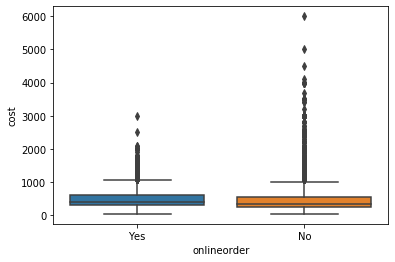

In [11]:
#ANALYSIS PART-->
# 1) plotting onlineorder vs cost to see how expensive restaurants behave in terms of online delivery features
import seaborn as sns
ax = sns.boxplot(x="onlineorder", y="cost", data=newdata)
plt.show()

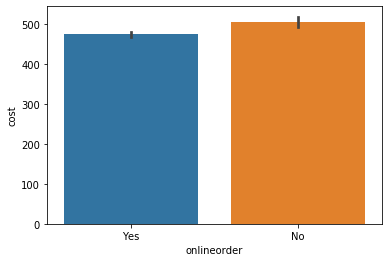

In [12]:
# grid=sns.FacetGrid(newdata)
# grid.map(sns.barplot,'onlineorder','extractedrating')
# plt.show()
sns.barplot('onlineorder','cost',data=newdata)
plt.show()

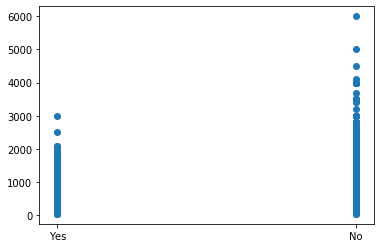

We observe that many expensive restaurants dont deliver online


In [13]:
#Here also we see the same results
plt.scatter(onlineordernew,costnew)
plt.show()

# We observe that many expensive restaurants dont deliver online
print("We observe that many expensive restaurants dont deliver online")

In [14]:
#Verifying for null or NAN in each column
newdata.isnull().sum()

name               0
location           0
onlineorder        0
cuisine            0
bigarea            0
cost               0
resttype           0
rating             0
extractedrating    0
votes              0
address            0
dtype: int64

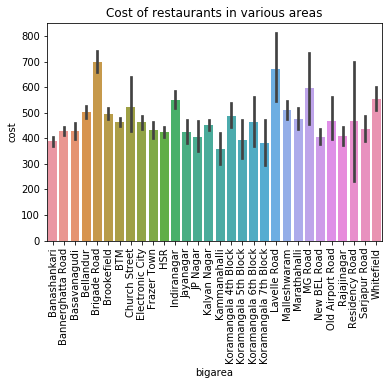

As we can see: Brigade road, Lavelle Road and MG road have most expensive restaurants
According to people of Bangalore, this makes sense!


In [15]:
# 2) Which areas have most expensive restaurants
sns.barplot(x='bigarea',y='cost',data=newdata)
plt.xticks(rotation=90)
f=plt.gcf()
plt.title('Cost of restaurants in various areas')
# f.set_size_inches(13,13)
plt.show()

#As we can see: Brigade road, Lavelle Road and MG road have most expensive restaurants
print("As we can see: Brigade road, Lavelle Road and MG road have most expensive restaurants")
print("According to people of Bangalore, this makes sense!")

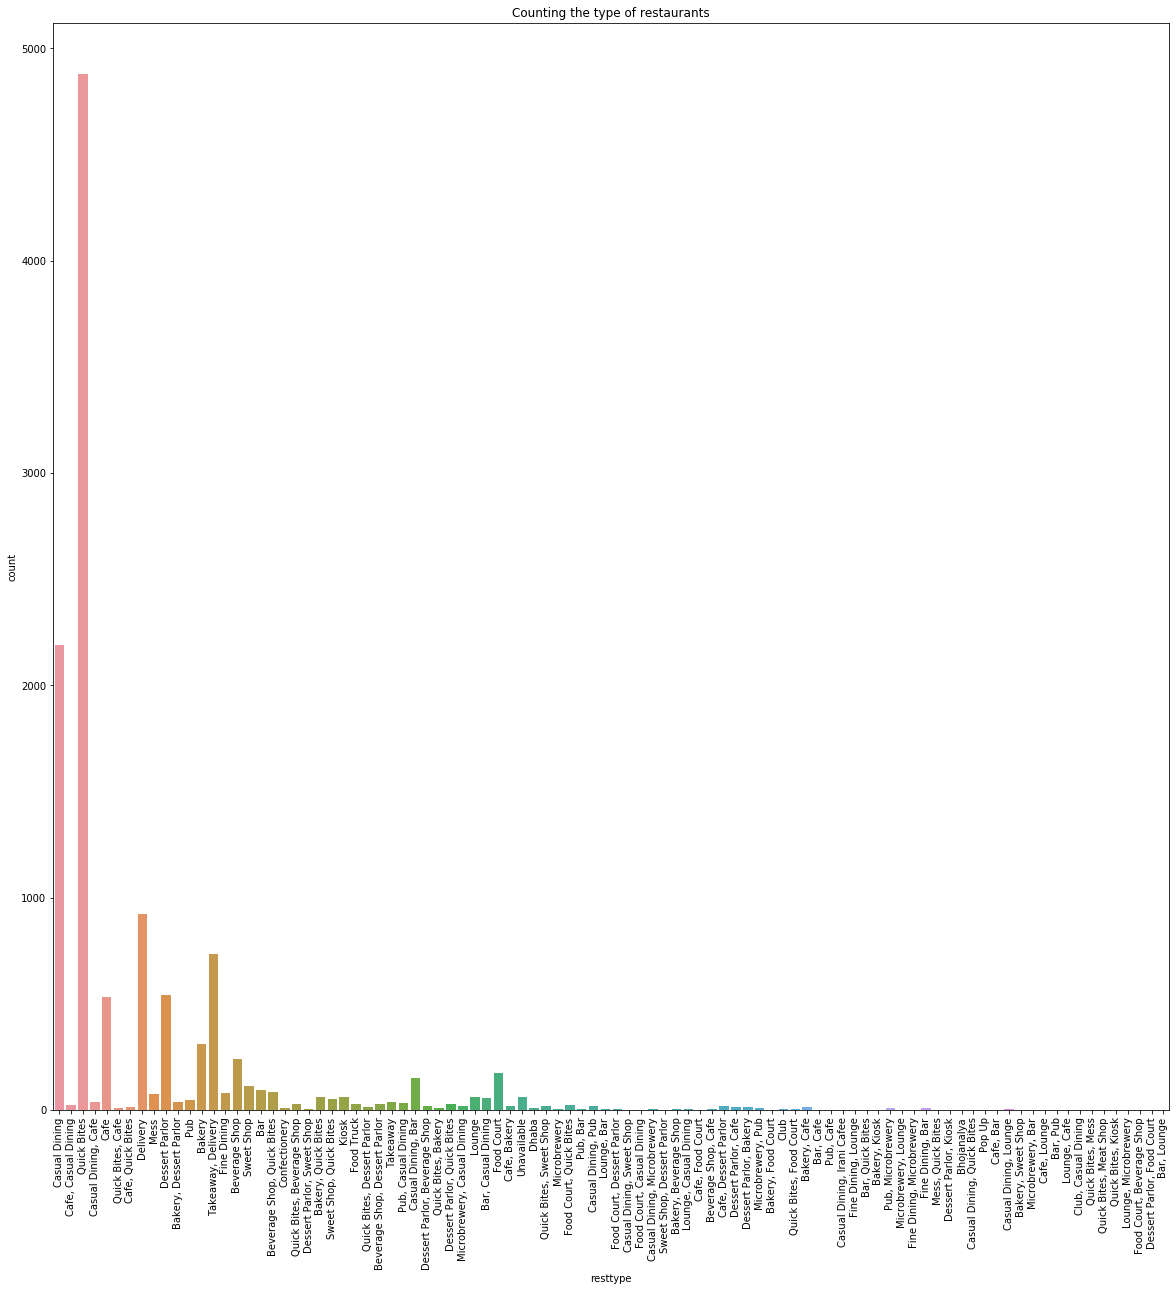

Maximum people prefer Quick Bites followed by casual dining.


In [16]:
# 3) What kind of restaurants do people prefer
sns.countplot('resttype',data=newdata)
plt.xticks(rotation=90)
plt.title('Counting the type of restaurants')
f=plt.gcf()
f.set_size_inches(20,20)
plt.show()
#Maximum people prefer Quick Bites followed by casual dining.
print("Maximum people prefer Quick Bites followed by casual dining.")

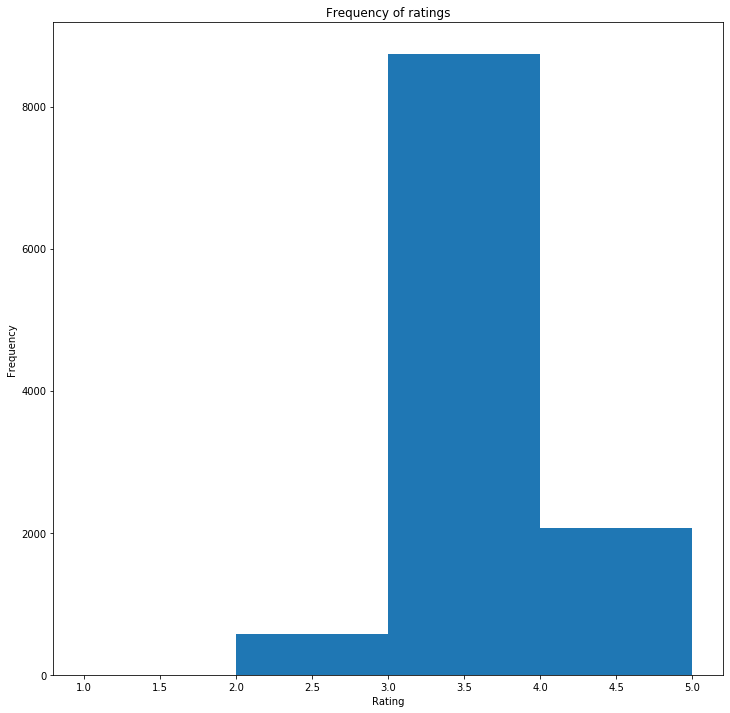

maximum resturants have rating in 3-4 interval.


In [17]:
# 4) Which interval has the most rating?
plt.hist(arr,bins=[1,2,3,4,5],label="Rating")
f=plt.gcf()
f.set_size_inches(12,12)
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.title("Frequency of ratings")
plt.show()
#maximum resturants have rating in 3-4 interval.
print("maximum resturants have rating in 3-4 interval.")

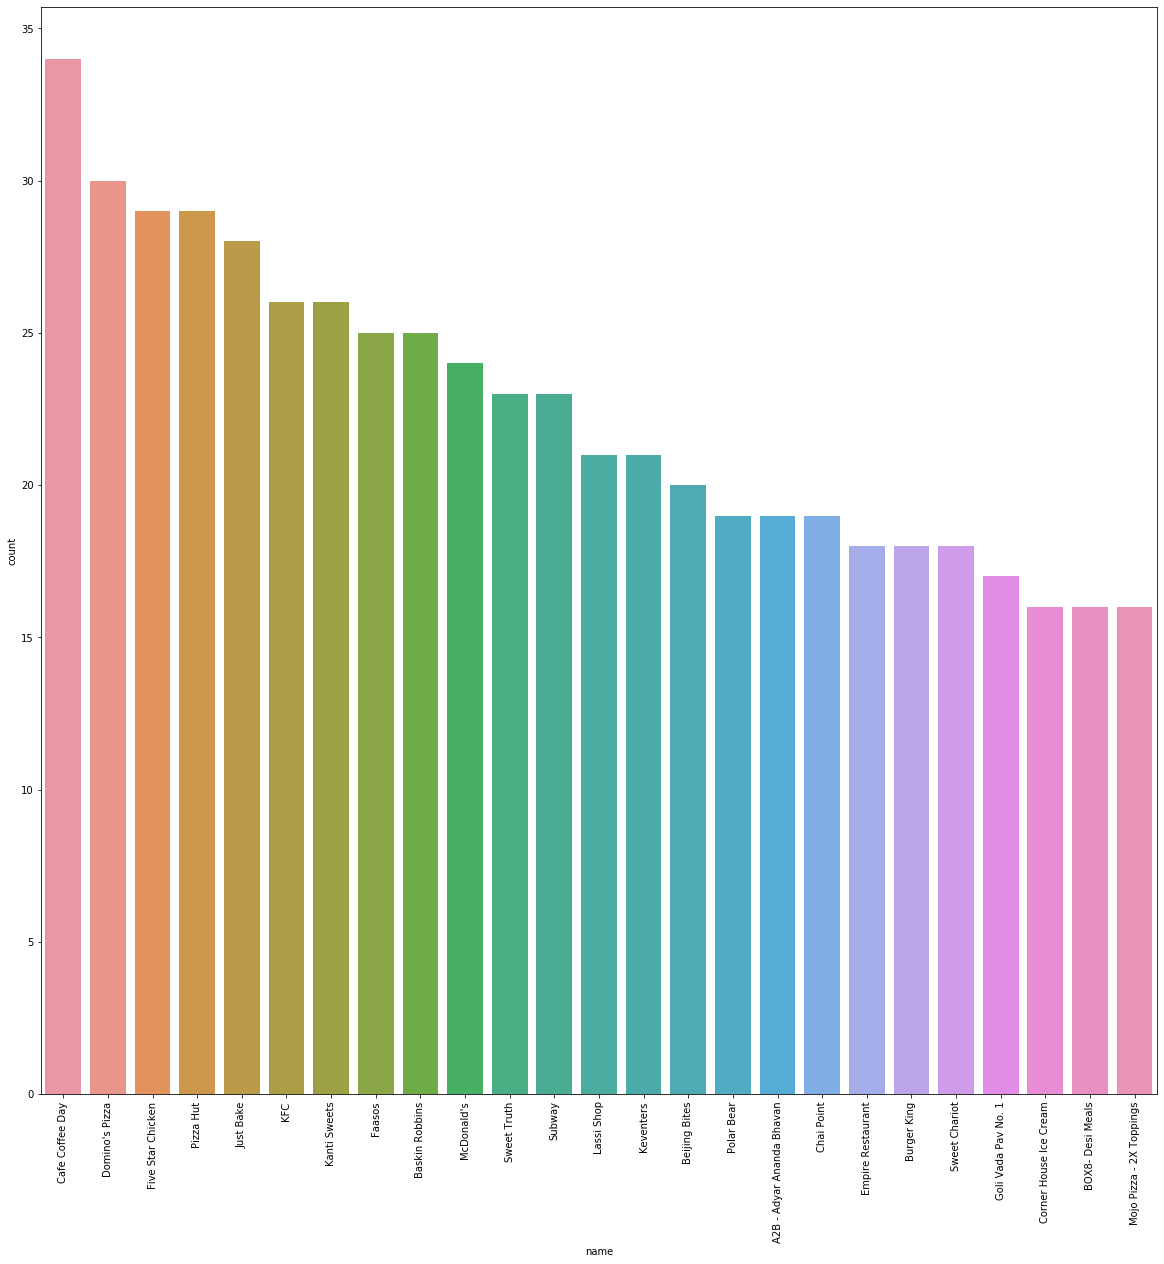

We observe that most famous chains are:
i)Cafe Coffee Day
ii) Dominos Pizza
iii) Five star chicken


In [18]:
# 5) Most famous restaurant chains in bangalore:
dchains={}
for i in namenew:
    if i not in dchains:
        dchains[i]=1
    else:
        dchains[i]+=1
# for i in dchains.keys():
#     x=dchains[i]
#     print(i,x)


lchains=sorted(dchains.items(),key= lambda x:x[1],reverse=True)

lchains=lchains[:25]
namechain=[]
countchain=[]
for i in lchains:
    namechain.append(i[0])
    countchain.append(i[1])
    
    
    
dataforchain= pd.DataFrame(
    {'name': namechain,
     'count':countchain
    })

#print(dataforchain)


#Plot the top 25 restaurant chains in bangalore
sns.barplot('name','count',data=dataforchain)
f=plt.gcf()
f.set_size_inches(20,20)
plt.xticks(rotation=90)
plt.show()

# We observe that most famous chains are:
# i)Cafe Coffee Day
# ii) Dominos Pizza
# iii) Five star chicken
print('''We observe that most famous chains are:
i)Cafe Coffee Day
ii) Dominos Pizza
iii) Five star chicken''')

# We gotta agree with these :P



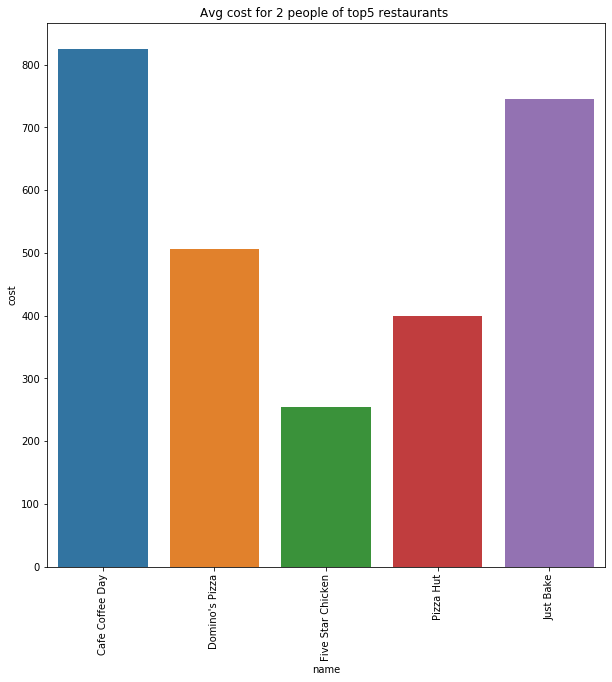

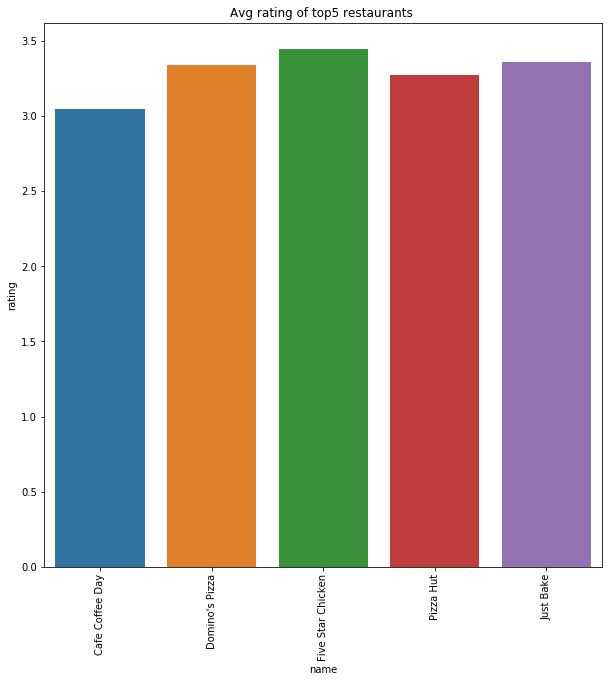

Observations:
1) Five star chicken has higher rating as compared to others because its cost is lower.
2) Cafe Coffee Day has most chain. But due to highest cost it has lower rating.


In [19]:
# 6) what makes the top chains successful?
#rating or cost

nametop5=namechain[:5]
counttop5=countchain[:5]
dtop5={}
for i in range(0,len(namenew)):
    ok=namenew[i]
    if ok in nametop5:
        if ok not in dtop5:
            dtop5[ok]=[arr[i],1,costnew[i]]
        else:
            dtop5[ok][0]+=arr[i]
            dtop5[ok][1]+=1
            dtop5[ok][2]+=costnew[i]
            
avgcost=[]
avgrating=[]
for i in dtop5.keys():
    x=dtop5[i][0]/dtop5[i][1]
    avgrating.append(x)
    avgcost.append(dtop5[i][2]/dtop5[i][1])

#print(avgcost)
#print(avgrating)

datafortop5= pd.DataFrame(
    {'name': nametop5,
     'cost':avgcost,
     'rating':avgrating
    })
datafortop5

sns.barplot('name','cost',data=datafortop5)
f=plt.gcf()
f.set_size_inches(10,10)
plt.xticks(rotation=90)
plt.title('Avg cost for 2 people of top5 restaurants ')
plt.show()

sns.barplot('name','rating',data=datafortop5)
f=plt.gcf()
f.set_size_inches(10,10)
plt.xticks(rotation=90)
plt.title('Avg rating of top5 restaurants ')
plt.show()

# Observations:
# 1) Five star chicken has higher rating as compared to others because its cost is lower.
# 2) Cafe Coffee Day has most chain. But due to highest cost it has lower rating.
print('''Observations:
1) Five star chicken has higher rating as compared to others because its cost is lower.
2) Cafe Coffee Day has most chain. But due to highest cost it has lower rating.''')

In [20]:
#Common observation from the first plot: Highly rated restaurants like Leela, Oberoi, Taj dont deliver online
# We test a hypothesis that these restaurants are better (rating wise) than those which deliver online
# H0 = L - N >=0
# H1 = l-N<0
orderno=[]
orderyes=[]
for i in range(len(onlineordernew)):
    if onlineordernew[i]=='Yes':
        orderyes.append(arr[i])
    else:
        orderno.append(arr[i])


orderno=orderno[:30]
orderyes=orderyes[:30]
a=np.mean(orderno)
b=np.std(orderno)
# L ~ N(a,b)
c=np.mean(orderyes)
d=np.std(orderyes)
#N~N(c,d)


#desired dist :K = L-N
#K~N(a-c,(b**2+d**2)**.5)
m=a-c
s=(b**2+d**2)**.5
z=(0-m)/s
# print(z)

import scipy.stats as st
leftarea=st.norm.cdf(z)
print(leftarea)

if leftarea<0.05:
    print("H0 rejected")
else:
    print("H0 cant be rejected and both are plausible")




0.6347944745790615
H0 cant be rejected and both are plausible


In [21]:
#Building our system for recommendation of restaurants based on factors that are valuable to us such as :
#1) Location
#2) Cost
#3) Rating
#4) Cuisine preferred

In [22]:
##distance
#Building a function that gives distances between any two areas between two places/ areas in Bangalore which takes into consideration
#the latitudes and longitudes between source and destination and calculates the distances.

In [23]:
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

file = r'zomato.csv'
df = pd.read_csv(file)
city=list(set(df['listed_in(city)']))

In [24]:
from math import radians, cos, sin, asin, sqrt

# #use haversine distance which is the greatest circle distance between longitude and latitude points
# def dist(s,d):
#   # convert decimal degrees to radians 

#   lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
#   # haversine formula 
#   dlon = lon2 - lon1 
#   dlat = lat2 - lat1 
#   a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#   c = 2 * asin(sqrt(a)) 
#   r = 6371 # Radius of earth in kilometers. Use 3956 for miles
#   return c * r

def dist(s,d):
    lat1,lon1=distances[s]
    lat2,lon2=distances[d]
    dlon=abs(lon2-lon1)
    dlat=abs(lat2-lat1)
#     a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
#     c = 2 * asin(sqrt(a))
#     r = 6371 #rounded up radius of earth
#     return c*r
    s=sqrt(pow(dlon,2)+pow(dlat,2))*108
    return s
    
    



#format -- 'name':[latitude,longitude] --> for easy lookup instead of using an API
distances={'Kammanahalli':[12.8549,77.6003],'Jayanagar':[12.9275,77.5906],'Sarjapur Road':[12.9005,77.7103],'Lavelle Road':[12.9712,77.5978],'Brigade Road':[12.9743,77.6077],'Whitefield':[12.969,77.7509],'Kalyan Nagar':[13.028,77.64],'Bellandur':[12.9243,77.6722],'Frazer Town':[12.9972,77.6143],'JP Nagar':[12.9105,77.5857],'Electronic City':[12.8421,77.6631],'Marathahalli':[12.9512,77.6998],'Bannerghatta Road':[12.7959,77.6172],'Koramangala 6th Block':[12.9381,77.6228],'New BEL Road':[13.0368,77.566],'Old Airport Road':[12.9606,77.642],'Brookefield':[12.9647,77.7195],'Residency Road':[12.9719,77.607],'Church Street':[12.9751,77.6047],'HSR':[12.9103,77.645],'Koramangala 7th Block':[12.9362,77.6127],'Rajajinagar':[12.9906,77.5533],'MG Road':[12.9738,77.6139],'Koramangala 5th Block':[12.9349,77.6201],'Malleshwaram':[13.0081,77.5648],'Koramangala 4th Block':[12.9334,77.6264],'Indiranagar':[12.9719,77.6412],'Banashankari':[12.9365,77.5447],'Basavanagudi':[12.9422,77.5748],'BTM':[12.9128,77.6092]}
# for i in distances:
#     print(i)
#printing number of areas that we have
print("Areas into consideration: ",len(distances)) 


Areas into consideration:  30


In [25]:
#print("Enter source and destination in Bangalore")
#creating a storage for easy lookup since nearest neighbours algorithm is a slow procedure.
distancedict={}
for i in range(0,len(city)):
    for j in range(i+1,len(city)):
        x=dist(city[i],city[j])
        if city[i] not in distancedict:
            distancedict[city[i]]={city[j]:x}
        else:
            distancedict[city[i]].update({city[j]:x})
            
        if city[j] not in distancedict:
            distancedict[city[j]]={city[i]:x}
        else:
            distancedict[city[j]].update({city[i]:x})
        
for i in distancedict.items():
    print(i)
    print()

('Rajajinagar', {'Koramangala 6th Block': 9.406855797768367, 'Church Street': 5.798111540838243, 'Koramangala 7th Block': 8.699009488442712, 'Residency Road': 6.141184276669139, 'New BEL Road': 5.174687886240254, 'Malleshwaram': 2.2615622918689025, 'Whitefield': 21.467922593489096, 'Electronic City': 19.945904205124894, 'MG Road': 6.791645927167528, 'Banashankari': 5.916162715814826, 'Brookefield': 18.166245291749572, 'Kalyan Nagar': 10.197653730148675, 'JP Nagar': 9.331706236268213, 'Old Airport Road': 10.112681946942006, 'Brigade Road': 6.133268557629107, 'Bannerghatta Road': 22.131121146476293, 'Indiranagar': 9.705649406402959, 'Basavanagudi': 5.719729350240499, 'HSR': 13.164034895122716, 'Kammanahalli': 15.509751363578081, 'Koramangala 5th Block': 9.393349281273471, 'Marathahalli': 16.384212249602097, 'Jayanagar': 7.916407366981704, 'Lavelle Road': 5.242852185596547, 'Bellandur': 14.702644170353494, 'BTM': 10.34640563674219, 'Koramangala 4th Block': 10.024500426456092, 'Frazer Town

In [26]:
#sorting dict 
#Modifying the above storage to create a better version which has a area and its nearest neighbours in a sorted manner to it.
sorteddistance={}
for i in distancedict.items():
    #print(i[0])
    d=sorted(i[1].items(),key=lambda x:x[1])
    #print(d)
    #print()
    sorteddistance[i[0]]=d

# for i in sorteddistance.items():
#      print(i)
#      print()
    
#sorteddistance['HSR']

In [27]:
newdata

,name,location,onlineorder,cuisine,bigarea,cost,resttype,rating,extractedrating,votes,address
0,Jalsa,Banashankari,Yes,"North Indian, Mughlai, Chinese",Banashankari,800.0,Casual Dining,4.1/5,4.1,775,"942, 21st Main Road, 2nd Stage, Banashankari, ..."
1,Spice Elephant,Banashankari,Yes,"Chinese, North Indian, Thai",Banashankari,800.0,Casual Dining,4.1/5,4.1,787,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ..."
2,San Churro Cafe,Banashankari,Yes,"Cafe, Mexican, Italian",Banashankari,800.0,"Cafe, Casual Dining",3.8/5,3.8,918,"1112, Next to KIMS Medical College, 17th Cross..."
3,Addhuri Udupi Bhojana,Banashankari,No,"South Indian, North Indian",Banashankari,300.0,Quick Bites,3.7/5,3.7,88,"1st Floor, Annakuteera, 3rd Stage, Banashankar..."
4,Grand Village,Basavanagudi,No,"North Indian, Rajasthani",Banashankari,600.0,Casual Dining,3.8/5,3.8,166,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza..."
5,Timepass Dinner,Basavanagudi,Yes,North Indian,Banashankari,600.0,Casual Dining,3.8/5,3.8,286,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar..."
6,Rosewood International Hotel - Bar & Restaurant,Mysore Road,No,"North Indian, South Indian, Andhra, Chinese",Banashankari,800.0,Casual Dining,3.6/5,3.6,8,"19/1, New Timberyard Layout, Beside Satellite ..."
7,Onesta,Banashankari,Yes,"Pizza, Cafe, Italian",Banashankari,600.0,"Casual Dining, Cafe",4.6/5,4.6,2556,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp..."
8,Penthouse Cafe,Banashankari,Yes,"Cafe, Italian, Continental",Banashankari,700.0,Cafe,4.0/5,4.0,324,"1, 30th Main Road, 3rd Stage, Banashankari, Ba..."
9,Smacznego,Banashankari,Yes,"Cafe, Mexican, Italian, Momos, Beverages",Banashankari,550.0,Cafe,4.2/5,4.2,504,"2470, 21 Main Road, 25th Cross, Banashankari, ..."


In [33]:
print("Since cost column has a lot of variability, we choose to normalize it.")
normalizedcost=[]
mincost=min(newdata['cost'])
maxcost=max(newdata['cost'])
#for i in newdata['cost']
print("range of data from",mincost, "and" ,maxcost," = ",maxcost-mincost)

Since cost column has a lot of variability, we choose to normalize it.
range of data from 40.0 and 6000.0  =  5960.0


In [34]:
for i in newdata['cost']:
        x=(i-mincost)/(maxcost-mincost)
        normalizedcost.append(x)
for i in range(0,len(normalizedcost)):
    #if normalizedcost[i]>0.9:
        #print(i,normalizedcost[i])
    print(newdata['cost'][i],normalizedcost[i])
newdata['normalizedcost']=normalizedcost

800.0 0.12751677852348994
800.0 0.12751677852348994
800.0 0.12751677852348994
300.0 0.0436241610738255
600.0 0.09395973154362416
600.0 0.09395973154362416
800.0 0.12751677852348994
600.0 0.09395973154362416
700.0 0.11073825503355705
550.0 0.08557046979865772
500.0 0.07718120805369127
600.0 0.09395973154362416
500.0 0.07718120805369127
450.0 0.06879194630872483
650.0 0.10234899328859061
800.0 0.12751677852348994
700.0 0.11073825503355705
300.0 0.0436241610738255
400.0 0.06040268456375839
400.0 0.06040268456375839
500.0 0.07718120805369127
900.0 0.14429530201342283
600.0 0.09395973154362416
300.0 0.0436241610738255
600.0 0.09395973154362416
200.0 0.026845637583892617
500.0 0.07718120805369127
550.0 0.08557046979865772
550.0 0.08557046979865772
600.0 0.09395973154362416
500.0 0.07718120805369127
500.0 0.07718120805369127
750.0 0.11912751677852348
500.0 0.07718120805369127
650.0 0.10234899328859061
400.0 0.06040268456375839
600.0 0.09395973154362416
750.0 0.11912751677852348
150.0 0.018456

In [35]:
#Displaying all the cuisines possible in a sorted manner
cleancuisine=[]
for i in newdata['cuisine']:
    x=i.split(",")
    for j in  x:
        if(j.strip() not in cleancuisine):
            cleancuisine.append(j.strip())
cleancuisine.sort()

for i in cleancuisine:
    print(i)

Afghan
Afghani
African
American
Andhra
Arabian
Asian
Assamese
Australian
Awadhi
BBQ
Bakery
Bar Food
Belgian
Bengali
Beverages
Bihari
Biryani
Bohri
British
Bubble Tea
Burger
Burmese
Cafe
Cantonese
Charcoal Chicken
Chettinad
Chinese
Coffee
Continental
Desserts
Drinks Only
European
Fast Food
Finger Food
French
German
Goan
Greek
Grill
Gujarati
Healthy Food
Hot dogs
Hyderabadi
Ice Cream
Indian
Indonesian
Iranian
Italian
Japanese
Jewish
Juices
Kashmiri
Kebab
Kerala
Konkan
Korean
Lebanese
Lucknowi
Maharashtrian
Malaysian
Malwani
Mangalorean
Mediterranean
Mexican
Middle Eastern
Mithai
Modern Indian
Momos
Mongolian
Mughlai
Naga
Nepalese
North Eastern
North Indian
Oriya
Paan
Pan Asian
Parsi
Pizza
Portuguese
Rajasthani
Raw Meats
Roast Chicken
Rolls
Russian
Salad
Sandwich
Seafood
Sindhi
Singaporean
South American
South Indian
Spanish
Sri Lankan
Steak
Street Food
Sushi
Tamil
Tea
Tex-Mex
Thai
Tibetan
Turkish
Vegan
Vietnamese
Wraps
unavailable


In [45]:
#Indexing the locations by integers to avoid confusion to the user in entering his location:
unilocations=[]
for i in sorteddistance.items():
    unilocations.append(i[0])

toenter={}
for i in range(0,len(unilocations)):
    toenter.update({i+1:unilocations[i]})
    
# for i in toenter.items():
#     print(i[0],i[1])

In [47]:
#Considering 3 nearest neighbours location wise to a particular location of the user.
# userlocationindex=int(input("Enter your current location index"))
# userlocation=toenter[userlocationindex]
# top3=sorteddistance[userlocation][:3]
# tocheck=[]
# for i in top3:
#     tocheck.append(i[0])
#print(tocheck)


In [48]:
#First nearest neighbour approach by selecting the hotels in nearest locations to the user.
#userdf=newdata.ix[(newdata['location']==tocheck[0]) | (newdata['location']==tocheck[1]) | (newdata['location']==tocheck[2])]


In [49]:
#By now we have the nearest restaurants to the user, we need to filter it further for important things such as cuisine,cost and rating.
#For convenience, wiping off a few very rare cuisines:
dcuisine={}
for i in newdata["cuisine"]:
    x=i.split(",")
    for j in x:
        if j.strip() not in dcuisine:
            dcuisine[j.strip()]=0
        dcuisine[j.strip()]+=1

cuisinetuple=sorted(dcuisine.items(),key =lambda x:-x[1])
# for i in cuisinetuple:
#     print(i)

In [50]:
#Displaying the cuisines in a menu based format and eliminating those cuisines that are not within ~10% of all our data.
topcuisine=list(filter(lambda x:x[1]>=100,cuisinetuple))
cuisinetop={}
for i in range(0,len(topcuisine)):
    cuisinetop.update({i+1:topcuisine[i][0]})

# for i in cuisinetop.items():
#     print(i[0],i[1])

In [52]:
def inputlocation():
    for i in toenter.items():
        print(i[0],i[1])   
    userlocationindex=int(input("Enter your current location index"))
    userlocation=toenter[userlocationindex]
    top3=sorteddistance[userlocation][:3]
    tocheck=[]
    for i in top3:
        tocheck.append(i[0])
    print(tocheck)
    userdf=newdata.ix[(newdata['location']==tocheck[0]) | (newdata['location']==tocheck[1]) | (newdata['location']==tocheck[2])]
    return userdf



def inputcuisine():
    print()
    print()
    for i in cuisinetop.items():
        print(i[0],i[1])
    usercuisine=list(map(int,input("Enter Your Cuisine choice: ").split()))
    print()
    print("Accepting the cuisine options and the cost for two that the user can mint in.")
    userprice=int(input("Enter approx amt: "))
    finalcuisine=[]
    for i in usercuisine:
        finalcuisine.append(cuisinetop[i])
    return finalcuisine

    
def recommend():
    userdf=inputlocation()
    finalcuisine=inputcuisine()
    result=[]
    cuisinelist=userdf['cuisine'].values.tolist()
    namelist=userdf['name'].values.tolist()
    addresslist=userdf['address'].values.tolist()
    ratinglist=userdf['extractedrating'].values.tolist()
    costlist=userdf['cost'].values.tolist()

    for i in range(len(cuisinelist)):
        if type(cuisinelist[i])!=type(9.0):
            x=cuisinelist[i].split(",")
            for j in finalcuisine:
                if j in x:
                    temp=[namelist[i],addresslist[i],ratinglist[i],costlist[i],cuisinelist[i]]
                    result.append(temp)

                    
    #result=filter(lambda x:abs(x[3]-userprice)<=159,result)
    result=sorted(result,key=lambda x:(abs(x[3]-userprice),-x[2]))
    if(len(result)==0):
        print("Sorry No Restaurants available according to your preference!")
        print("Press 1 for retry.")
        print("Press 0 to Quit.")
        choice=int(input())
        if(choice==1):
            recommend()
        else:
            return
    else:
        for i in range(0,5):
            print()
        j=0
        for i in result:
            if(j<7):
                print(j+1,".")
                print("Resturant Name:",i[0])
                print("Rating: ",i[2])
                print("Approx Cost: ",i[3])
                print("Cuisines: ",i[4])
                print("Address:  ",i[1])
                print()
                j=j+1
            else:
                break
    
    
    





    


recommend()
    
    
    

1 Rajajinagar
2 Koramangala 6th Block
3 Church Street
4 Koramangala 7th Block
5 Residency Road
6 New BEL Road
7 Malleshwaram
8 Whitefield
9 Electronic City
10 MG Road
11 Banashankari
12 Brookefield
13 Kalyan Nagar
14 JP Nagar
15 Old Airport Road
16 Brigade Road
17 Bannerghatta Road
18 Indiranagar
19 Basavanagudi
20 HSR
21 Kammanahalli
22 Koramangala 5th Block
23 Marathahalli
24 Jayanagar
25 Lavelle Road
26 Bellandur
27 BTM
28 Koramangala 4th Block
29 Frazer Town
30 Sarjapur Road
Enter your current location index24


C:\Users\Amogh Desai\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


['JP Nagar', 'Basavanagudi', 'BTM']


1 North Indian
2 Chinese
3 South Indian
4 Fast Food
5 Biryani
6 Desserts
7 Beverages
8 Continental
9 Cafe
10 Street Food
11 Bakery
12 Italian
13 Andhra
14 Ice Cream
15 Pizza
16 Burger
17 Rolls
18 Seafood
19 Mughlai
20 Kerala
21 Juices
22 Momos
23 Mithai
24 Kebab
25 Arabian
26 American
27 Sandwich
28 Asian
29 Salad
30 Thai
31 Healthy Food
32 Finger Food
33 BBQ
34 Bengali
35 Mangalorean
36 Mexican
37 European
Enter Your Cuisine choice: 30

Accepting the cuisine options and the cost for two that the user can mint in.
Enter approx amt: 1200
Sorry No Restaurants available according to your preference!
Press 1 for retry.
Press 0 to Quit.
1
1 Rajajinagar
2 Koramangala 6th Block
3 Church Street
4 Koramangala 7th Block
5 Residency Road
6 New BEL Road
7 Malleshwaram
8 Whitefield
9 Electronic City
10 MG Road
11 Banashankari
12 Brookefield
13 Kalyan Nagar
14 JP Nagar
15 Old Airport Road
16 Brigade Road
17 Bannerghatta Road
18 Indiranagar
19 Basavanagudi
20 HSR